# ICW1

package will use

In [1]:
#import and load the package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from itertools import cycle

## The Project Questions

input data from csv file:

In [2]:
Dataset_1 = pd.read_csv('dataset_1.csv', index_col=0, low_memory=False)#input data from csv file with the index
Dataset_1 = Dataset_1.T #transform the data -> let features be column name sample be row name
Dataset_1 #check the dataset

ACTL6A_S5     ADAM9_S2   ADAMTS1_S5     ADCY7_S3   
TCGA.HF.7136.STAD.C1_    0.592349159  0.628634428  0.570785319  0.536637178  \
TCGA.EW.A1OZ.BRCA.C1_    0.616707551  0.589805879  0.546914715  0.522103124   
TCGA.EY.A1GL.UCEC.C1_    0.591583228   0.60137506  0.530573235  0.470163893   
TCGA.EB.A5FP.SKCM.C1_     0.60418886  0.586197969  0.566643527  0.523075884   
TCGA.D1.A16D.UCEC.C1_    0.545902837  0.632497249   0.58791722  0.533485849   
...                              ...          ...          ...          ...   
TCGA.FB.AAQ1.PAAD.C6_.2  0.547088474  0.669353783  0.556373656  0.575362692   
TCGA.DX.A1KU.SARC.C6_.1   0.54993579  0.652694922  0.674654449  0.521712202   
TCGA.A2.A4S1.BRCA.C6_    0.513619217  0.599381792  0.589908476  0.543181612   
TCGA.3U.A98I.MESO.C6_.1  0.504295371  0.620086907  0.602403486  0.542429285   
TCGA.AR.A2LJ.BRCA.C6_    0.540357583   0.55191784  0.526152563  0.489544812   

                            AIMP2_S5    ALKBH7_S5   ALOX5AP_S3     AMPD3_S3   
TCGA.HF.7136.STAD.C1_    0.509823444  0.462217686  0.443087096  0.482923423  \
TCGA.EW.A1OZ.BRCA.C1_    0.523892866  0.545415692  0.518862114  0.428246143   
TCGA.EY.A1GL.UCEC.C1_    0.573793291  0.560062178  0.408029142  0.529846796   
TCGA.EB.A5FP.SKCM.C1_    0.575625221  0.497917854  0.362421719  0.428469267   
TCGA.D1.A16D.UCEC.C1_    0.540957612  0.556670227  0.518468063  0.510708281   
...                              ...          ...          ...          ...   
TCGA.FB.AAQ1.PAAD.C6_.2  0.511424709  0.534338128  0.584272643  0.474198022   
TCGA.DX.A1KU.SARC.C6_.1  0.510103123   0.50135204  0.521481461  0.501617299   
TCGA.A2.A4S1.BRCA.C6_      0.4788955  0.507401046  0.570468374  0.483157655   
TCGA.3U.A98I.MESO.C6_.1  0.476758106  0.503558058  0.511588826  0.457273386   
TCGA.AR.A2LJ.BRCA.C6_    0.518348041  0.603053115  0.517177218  0.453268531   

                           APITD1_S5     APOC1_S3  ...     WIPF1_S3   
TCGA.HF.7136.STAD.C1_    0.418518998  0.483556486  ...  0.557670757  \
TCGA.EW.A1OZ.BRCA.C1_    0.447287266  0.588167354  ...  0.543130808   
TCGA.EY.A1GL.UCEC.C1_    0.516928306  0.500290877  ...  0.537821188   
TCGA.EB.A5FP.SKCM.C1_    0.544391175  0.580779692  ...  0.635673186   
TCGA.D1.A16D.UCEC.C1_    0.488153784  0.585869525  ...  0.533509926   
...                              ...          ...  ...          ...   
TCGA.FB.AAQ1.PAAD.C6_.2  0.450351433  0.575779881  ...  0.548371597   
TCGA.DX.A1KU.SARC.C6_.1  0.430389962  0.517204617  ...   0.63649641   
TCGA.A2.A4S1.BRCA.C6_    0.441636966   0.46383583  ...  0.601900974   
TCGA.3U.A98I.MESO.C6_.1  0.436591435  0.539356545  ...  0.585780294   
TCGA.AR.A2LJ.BRCA.C6_    0.484431339  0.650399976  ...  0.563844585   

                            WNT2B_S2     WNT8B_S2      WSB2_S5    ZWILCH_S5   
TCGA.HF.7136.STAD.C1_    0.348505759   0.21001634  0.629422932  0.515652808  \
TCGA.EW.A1OZ.BRCA.C1_    0.271636495  0.215561609  0.588503202  0.520021651   
TCGA.EY.A1GL.UCEC.C1_    0.370267472  0.256228773  0.626341995  0.500481153   
TCGA.EB.A5FP.SKCM.C1_    0.360680436  0.261152768  0.612561409  0.564330771   
TCGA.D1.A16D.UCEC.C1_    0.332905555  0.129105571   0.60903958  0.482094262   
...                              ...          ...          ...          ...   
TCGA.FB.AAQ1.PAAD.C6_.2  0.301071951  0.202440846  0.554636793   0.47268884   
TCGA.DX.A1KU.SARC.C6_.1  0.431338453   0.18709252  0.586367439  0.486879106   
TCGA.A2.A4S1.BRCA.C6_    0.340523965  0.171784796  0.541963837  0.450655279   
TCGA.3U.A98I.MESO.C6_.1  0.476789408  0.182592379  0.563271127  0.493495531   
TCGA.AR.A2LJ.BRCA.C6_    0.215692689  0.201434471  0.558990676  0.462621113   

                              ZYX_S2      MMP3_S2       PLG_S5      RGS8_S5   
TCGA.HF.7136.STAD.C1_    0.664830576  0.548405265  0.144131649  0.156692658  \
TCGA.EW.A1OZ.BRCA.C1_    0.661330832   0.48897231  0.129630028  0.147664886   
TCGA.EY.A1GL.UCEC.C1_    0.650542802  0.602703844  0.236607056  0.236607056   
TCGA.EB.A5F

In [3]:
#sns.pairplot(Dataset_1)
# 440 feature not choose this to plot all feature for obsercation

### Data Preparation and Addressing Missingness

#### a. Data Cleaning

Cleaning data involves: 
1. Data Separation
2. Header
3. Data Type
4. Handing Missing Data 
5. Outliers
6. Duplicates
7. Scaling/Normalization
8. Data Formatting
9. Text Cleaning
10. Save Cleaned Data

Bad data in data set need to be fixxed

Bad data could be:
1. Empty cells
2. Data in wrong format
3. Wrong data
4. Duplicates

challenges: The high dimensional data not easy to find out the problem by observation and some feature have relationship between each other

##### check the data type

Check the data type first because if the data type is wrong it will return error when we using function to operate it. And It will more effective to clean the data.

In [4]:
#get the data type of the DataFrame content
Dataset_1.dtypes

ACTL6A_S5     object
ADAM9_S2      object
ADAMTS1_S5    object
ADCY7_S3      object
AIMP2_S5      object
               ...  
ZYX_S2        object
MMP3_S2       object
PLG_S5        object
RGS8_S5       object
Subgroup      object
Length: 441, dtype: object

In [5]:
Dataset_1.describe()

ACTL6A_S5     ADAM9_S2   ADAMTS1_S5     ADCY7_S3     AIMP2_S5   
count           588          588          588          588          588  \
unique          540          540          540          540          540   
top     0.547088474  0.669353783  0.556373656  0.575362692  0.511424709   
freq              3            3            3            3            3   

          ALKBH7_S5   ALOX5AP_S3     AMPD3_S3    APITD1_S5     APOC1_S3  ...   
count           588          588          588          588          588  ...  \
unique          540          540          540          540          540  ...   
top     0.534338128  0.584272643  0.474198022  0.450351433  0.575779881  ...   
freq              3            3            3            3            3  ...   

           WIPF1_S3     WNT2B_S2     WNT8B_S2      WSB2_S5   ZWILCH_S5   
count           588          588          588          588         588  \
unique          540          540          540          540         540   
top     0.548371597  0.301071951  0.202440846  0.554636793  0.47268884   
freq              3            3            3            3           3   

             ZYX_S2      MMP3_S2       PLG_S5      RGS8_S5 Subgroup  
count           588          588          588          588      588  
unique          540          540          540          540        6  
top     0.653400943  0.307704021  0.332027894  0.125693204       C1  
freq              3            3            3            3       98  

[4 rows x 441 columns]

It shows all data are store by object(string) but if we want to do some mathmatic operation for example, mean, max, min...... it needs to translate it to numberic

In [6]:
#all data are decimal so change the object(string) to float64 -> can have 18 digits after the decimal point
Dataset_1[Dataset_1.columns[0:-1]] = Dataset_1[Dataset_1.columns[0:-1]].astype('float64')

In [7]:
#check the data: never lost data after change data type
Dataset_1

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_     0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_     0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_     0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_     0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_     0.545903  0.632497    0.587917  0.533486  0.540958   
...                            ...       ...         ...       ...       ...   
TCGA.FB.AAQ1.PAAD.C6_.2   0.547088  0.669354    0.556374  0.575363  0.511425   
TCGA.DX.A1KU.SARC.C6_.1   0.549936  0.652695    0.674654  0.521712  0.510103   
TCGA.A2.A4S1.BRCA.C6_     0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.3U.A98I.MESO.C6_.1   0.504295  0.620087    0.602403  0.542429  0.476758   
TCGA.AR.A2LJ.BRCA.C6_     0.540358  0.551918    0.526153  0.489545  0.518348   

                         ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_     0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_     0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_     0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.EB.A5FP.SKCM.C1_     0.497918    0.362422  0.428469   0.544391  0.580780   
TCGA.D1.A16D.UCEC.C1_     0.556670    0.518468  0.510708   0.488154  0.585870   
...                            ...         ...       ...        ...       ...   
TCGA.FB.AAQ1.PAAD.C6_.2   0.534338    0.584273  0.474198   0.450351  0.575780   
TCGA.DX.A1KU.SARC.C6_.1   0.501352    0.521481  0.501617   0.430390  0.517205   
TCGA.A2.A4S1.BRCA.C6_     0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.3U.A98I.MESO.C6_.1   0.503558    0.511589  0.457273   0.436591  0.539357   
TCGA.AR.A2LJ.BRCA.C6_     0.603053    0.517177  0.453269   0.484431  0.650400   

                         ...  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5   
TCGA.HF.7136.STAD.C1_    ...  0.557671  0.348506  0.210016  0.629423  \
TCGA.EW.A1OZ.BRCA.C1_    ...  0.543131  0.271636  0.215562  0.588503   
TCGA.EY.A1GL.UCEC.C1_    ...  0.537821  0.370267  0.256229  0.626342   
TCGA.EB.A5FP.SKCM.C1_    ...  0.635673  0.360680  0.261153  0.612561   
TCGA.D1.A16D.UCEC.C1_    ...  0.533510  0.332906  0.129106  0.609040   
...                      ...       ...       ...       ...       ...   
TCGA.FB.AAQ1.PAAD.C6_.2  ...  0.548372  0.301072  0.202441  0.554637   
TCGA.DX.A1KU.SARC.C6_.1  ...  0.636496  0.431338  0.187093  0.586367   
TCGA.A2.A4S1.BRCA.C6_    ...  0.601901  0.340524  0.171785  0.541964   
TCGA.3U.A98I.MESO.C6_.1  ...  0.585780  0.476789  0.182592  0.563271   
TCGA.AR.A2LJ.BRCA.C6_    ...  0.563845  0.215693  0.201434  0.558991   

                         ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5   
TCGA.HF.7136.STAD.C1_     0.515653  0.664831  0.548405  0.144132  0.156693  \
TCGA.EW.A1OZ.BRCA.C1_     0.520022  0.661331  0.488972  0.129630  0.147665   
TCGA.EY.A1GL.UCEC.C1_     0.500481  0.650543  0.602704  0.236607  0.236607   
TCGA.EB.A5FP.SKCM.C1_     0.564331  0.620690  0.457935  0.261153  0.261153   
TCGA.D1.A16D.UCEC.C1_     0.482094  0.670960  0.389138  0.282479  0.151172   
...                            ...       ...       ...       ...       ...   
TCGA.FB.AAQ1.PAAD.C6_.2   0.472689  0.653401  0.307704  0.332028  0.125693   
TCGA.DX.A1KU.SARC.C6_.1   0.486879  0.666805  0.485532  0.163456  0.216325   
TCGA.A2.A4S1.BRCA.C6_     0.450655  0.643585  0.259902  0.171785  0.171785   
TCGA.3U.A98I.MESO.C6_.1   0.493496  0.659347  0.204457  0.146536  0.182592   
TCGA.AR.A2LJ.BRCA.C6_     0.462621  0.676615  0.476988  0.133939  0.133939   

                         Subgroup  
TCGA.HF.7136.STAD.C1_          C1  
TCGA.EW.A1OZ.BRCA.C1_          C1  
TCGA.EY.A1GL.UCEC.C1_          C1  
TCGA.EB.A5FP.SKCM.C1_          C1  
TCGA.D1.A16D.UCEC.C1_          C1  
...                           ...  
TCGA.FB.AAQ1.PAAD.C6_.2        C6  
T

In [8]:
Dataset_1.dtypes

ACTL6A_S5     float64
ADAM9_S2      float64
ADAMTS1_S5    float64
ADCY7_S3      float64
AIMP2_S5      float64
               ...   
ZYX_S2        float64
MMP3_S2       float64
PLG_S5        float64
RGS8_S5       float64
Subgroup       object
Length: 441, dtype: object

Now number in Dataset are store in float64 data type 

Get statistic details about the dataset and data distribution

In [9]:
#statistic details of the dataset : min max mean std.... 
Dataset_1.describe()

ACTL6A_S5    ADAM9_S2  ADAMTS1_S5    ADCY7_S3    AIMP2_S5   ALKBH7_S5   
count  588.000000  588.000000  588.000000  588.000000  588.000000  588.000000  \
mean     0.561551    0.617498    0.548594    0.530525    0.531586    0.550029   
std      0.031263    0.045431    0.057663    0.039461    0.037694    0.045562   
min      0.454512    0.481747    0.367899    0.420165    0.394824    0.406076   
25%      0.540899    0.595816    0.508768    0.502042    0.504046    0.519404   
50%      0.558783    0.617728    0.544527    0.532039    0.535152    0.551989   
75%      0.581267    0.645072    0.586353    0.559252    0.559505    0.581758   
max      0.710251    0.746323    0.729066    0.678374    0.636284    0.679299   

       ALOX5AP_S3    AMPD3_S3   APITD1_S5    APOC1_S3  ...    WDR77_S5   
count  588.000000  588.000000  588.000000  588.000000  ...  588.000000  \
mean     0.483884    0.493659    0.477836    0.573563  ...    0.550060   
std      0.053663    0.044309    0.036428    0.086896  ...    0.031076   
min      0.331671    0.368469    0.322530    0.324714  ...    0.469474   
25%      0.445604    0.465907    0.452058    0.517147  ...    0.526566   
50%      0.486738    0.492044    0.477274    0.574435  ...    0.551257   
75%      0.521481    0.516225    0.502244    0.620487  ...    0.571871   
max      0.616650    0.682606    0.569738    0.908518  ...    0.648555   

         WIPF1_S3    WNT2B_S2    WNT8B_S2     WSB2_S5   ZWILCH_S5      ZYX_S2   
count  588.000000  588.000000  588.000000  588.000000  588.000000  588.000000  \
mean     0.568496    0.355256    0.210675    0.607736    0.494147    0.643149   
std      0.036815    0.074243    0.063276    0.034675    0.035358    0.026195   
min      0.445756    0.175897    0.055078    0.491753    0.393490    0.542554   
25%      0.543102    0.303990    0.165478    0.581120    0.468319    0.626829   
50%      0.572505    0.349658    0.208920    0.603647    0.492761    0.640914   
75%      0.596134    0.397857    0.253542    0.634212    0.518996    0.660907   
max      0.666154    0.611041    0.455048    0.704738    0.613592    0.745479   

          MMP3_S2      PLG_S5     RGS8_S5  
count  588.000000  588.000000  588.000000  
mean     0.321869    0.219206    0.192180  
std      0.130251    0.147881    0.078831  
min      0.056857    0.026909    0.046179  
25%      0.220870    0.137597    0.134364  
50%      0.287781    0.186938    0.178872  
75%      0.420708    0.232155    0.239960  
max      0.782070    0.833178    0.540641  

[8 rows x 440 columns]

If the data type never be Converted, it will only show the count cannot show the statistic details

All data are between 0 to 1.

##### remove the duplicates

check the duplicates, it is one of the bad data

In [10]:
#check the duplicated and show how many
Dataset_1.duplicated(keep=False)
#show the location of the duplicated:
Dataset_1.loc[Dataset_1.duplicated(),:]

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.EB.A5FP.SKCM.C1_.1   0.604189  0.586198    0.566644  0.523076  0.575625  \
TCGA.31.1944.OV.C1_.1     0.603431  0.607367    0.558262  0.514740  0.511529   
TCGA.DK.A1A7.BLCA.C1_.1   0.610827  0.547774    0.588034  0.463769  0.499116   
TCGA.EW.A1OZ.BRCA.C1_.1   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.E2.A15M.BRCA.C2_.1   0.558220  0.635687    0.545919  0.547288  0.459488   
TCGA.25.2396.OV.C2_.1     0.602502  0.561905    0.607953  0.536461  0.529014   
TCGA.FY.A3WA.THCA.C3_.1   0.576086  0.650131    0.634087  0.490138  0.543803   
TCGA.5L.AAT0.BRCA.C3_.1   0.556582  0.530522    0.480498  0.525609  0.498281   
TCGA.EM.A2CO.THCA.C3_.1   0.566019  0.644224    0.604911  0.479800  0.619699   
TCGA.G9.7509.PRAD.C3_.1   0.581532  0.668286    0.605955  0.453622  0.552538   
TCGA.BK.A4ZD.UCEC.C4_.1   0.599205  0.661167    0.566843  0.563508  0.543773   
TCGA.26.5134.GBM.C4_.1    0.564803  0.604823    0.528689  0.535618  0.507838   
TCGA.DD.AACX.LIHC.C4_.1   0.550832  0.602355    0.527694  0.491883  0.569211   
TCGA.4G.AAZO.CHOL.C4_.1   0.564792  0.654620    0.499157  0.527904  0.527171   
TCGA.CZ.5454.KIRC.C4_.1   0.538890  0.648853    0.588471  0.515182  0.457138   
TCGA.E1.A7YM.LGG.C5_.1    0.543830  0.603269    0.534986  0.534850  0.564547   
TCGA.DU.5871.LGG.C5_.1    0.563364  0.625737    0.462978  0.576733  0.549523   
TCGA.F6.A8O3.LGG.C5_.1    0.574676  0.648779    0.494008  0.591905  0.595162   
TCGA.S9.A6WE.LGG.C5_.1    0.559885  0.622396    0.554979  0.552939  0.558326   
TCGA.HW.7486.LGG.C5_.1    0.549327  0.626137    0.539728  0.555930  0.564257   
TCGA.P5.A5EV.LGG.C5_.1    0.548458  0.611815    0.444916  0.585870  0.567410   
TCGA.WY.A85D.LGG.C5_.1    0.572493  0.603834    0.451809  0.574472  0.561053   
TCGA.CS.4938.LGG.C5_.1    0.551088  0.617728    0.494956  0.608151  0.560231   
TCGA.E1.A7YU.LGG.C5_.1    0.531447  0.600096    0.479767  0.554191  0.562935   
TCGA.TM.A7C4.LGG.C5_.1    0.557283  0.631137    0.486160  0.559143  0.545856   
TCGA.HT.7483.LGG.C5_.1    0.550164  0.658776    0.556542  0.588742  0.559105   
TCGA.OR.A5J8.ACC.C6_.1    0.523671  0.575966    0.571506  0.523788  0.540236   
TCGA.D7.A748.STAD.C6_.1   0.506645  0.667325    0.510963  0.512853  0.469270   
TCGA.DX.AB2L.SARC.C6_.1   0.530221  0.603020    0.569074  0.559047  0.515473   
TCGA.BH.A0H5.BRCA.C6_.1   0.524347  0.554779    0.521978  0.552790  0.461483   
TCGA.D8.A141.BRCA.C6_.1   0.536416  0.601544    0.491975  0.578207  0.477198   
TCGA.A7.A0DB.BRCA.C6_.1   0.573799  0.611509    0.516464  0.507130  0.519182   
TCGA.FB.A4P5.PAAD.C6_.1   0.503231  0.601942    0.591569  0.532252  0.479578   
TCGA.FB.AAQ1.PAAD.C6_.1   0.547088  0.669354    0.556374  0.575363  0.511425   
TCGA.A8.A08Z.BRCA.C6_.1   0.564599  0.631282    0.543308  0.579381  0.499691   
TCGA.AR.A0TT.BRCA.C6_.1   0.550148  0.589376    0.496296  0.567811  0.494039   
TCGA.EL.A3GP.THCA.C6_.1   0.539347  0.602059    0.587730  0.534294  0.484431   
TCGA.DX.AB2Z.SARC.C6_.1   0.566796  0.606668    0.535313  0.563848  0.486424   
TCGA.05.5715.LUAD.C6_.1   0.526272  0.679035    0.496053  0.500599  0.496956   
TCGA.XF.AAN8.BLCA.C6_.1   0.490200  0.571726    0.679305  0.501556  0.500526   
TCGA.05.5715.LUAD.C6_.2   0.526272  0.679035    0.496053  0.500599  0.496956   
TCGA.3U.A98H.MESO.C6_.1   0.507051  0.607413    0.509807  0.548012  0.491548   
TCGA.E7.A7DU.BLCA.C6_.1   0.595040  0.595816    0.555534  0.475091  0.540981   
TCGA.E7.A7DU.BLCA.C6_.2   0.595040  0.595816    0.555534  0.475091  0.540981   
TCGA.A7.A0DB.BRCA.C6_.2   0.573799  0.611509    0.516464  0.507130  0.519182   
TCGA.FB.AAQ1.PAAD.C6_.2   0.547088  0.669354    0.556374  0.575363  0.511425   
TCGA.DX.A1KU.SARC.C6_.1   0.549936  0.652695    0.674654  0.521712  0.510103   
TCGA.3U.A98I.MESO.C6_.1   0.504295  0.620087    0.602403  0.542429  0.476758   

                         ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.EB.A5FP.SKCM.C1_.1

All of this are duplicated data. Means this 48 rows has appear two times in the dataset. After checking, there are some duplicated data

In [11]:
#delete duplicated data 
Dataset_1 = Dataset_1.drop_duplicates()

In [12]:
# check the data after drop duplicated data
Dataset_1

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_   0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_   0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.EB.A5FP.SKCM.C1_   0.497918    0.362422  0.428469   0.544391  0.580780   
TCGA.D1.A16D.UCEC.C1_   0.556670    0.518468  0.510708   0.488154  0.585870   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.488698    0.592145  0.510097   0.408028  0.572360   
TCGA.SH.A7BC.MESO.C6_   0.523583    0.550000  0.501574   0.417098  0.594076   
TCGA.EL.A3T9.THCA.C6_   0.514959    0.532856  0.477059   0.474861  0.471344   
TCGA.A2.A4S1.BRCA.C6_   0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.AR.A2LJ.BRCA.C6_   0.603053    0.517177  0.453269   0.484431  0.650400   

                       ...  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  ZWILCH_S5   
TCGA.HF.7136.STAD.C1_  ...  0.557671  0.348506  0.210016  0.629423   0.515653  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.543131  0.271636  0.215562  0.588503   0.520022   
TCGA.EY.A1GL.UCEC.C1_  ...  0.537821  0.370267  0.256229  0.626342   0.500481   
TCGA.EB.A5FP.SKCM.C1_  ...  0.635673  0.360680  0.261153  0.612561   0.564331   
TCGA.D1.A16D.UCEC.C1_  ...  0.533510  0.332906  0.129106  0.609040   0.482094   
...                    ...       ...       ...       ...       ...        ...   
TCGA.43.2581.LUSC.C6_  ...  0.584858  0.256580  0.154807  0.574657   0.465805   
TCGA.SH.A7BC.MESO.C6_  ...  0.580386  0.560368  0.185317  0.567794   0.471550   
TCGA.EL.A3T9.THCA.C6_  ...  0.587950  0.286881  0.189631  0.562508   0.489268   
TCGA.A2.A4S1.BRCA.C6_  ...  0.601901  0.340524  0.171785  0.541964   0.450655   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.563845  0.215693  0.201434  0.558991   0.462621   

                         ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  Subgroup  
TCGA.HF.7136.STAD.C1_  0.664831  0.548405  0.144132  0.156693        C1  
TCGA.EW.A1OZ.BRCA.C1_  0.661331  0.488972  0.129630  0.147665        C1  
TCGA.EY.A1GL.UCEC.C1_  0.650543  0.602704  0.236607  0.236607        C1  
TCGA.EB.A5FP.SKCM.C1_  0.620690  0.457935  0.261153  0.261153        C1  
TCGA.D1.A16D.UCEC.C1_  0.670960  0.389138  0.282479  0.151172        C1  
...                         ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_  0.654632  0.372903  0.098287  0.098287        C6  
TCGA.SH.A7BC.MESO.C6_  0.683370  0.354513  0.093081  0.093081        C6  
TCGA.EL.A3T9.THCA.C6_  0.645087  0.247726  0.172708  0.172708        C6  
TCGA.A2.A4S1.BRCA.C6_  0.643585  0.259902  0.171785  0.171785        C6  
TCGA.AR.A2LJ.BRCA.C6_  0.676615  0.476988  0.133939  0.133939        C6  

[540 rows x 441 columns]

##### finding outliers

Plot Dataset Histogram and Kernel Density Estimation for observation but cannot get too much details because this is a high dimensional with so many features I prefer to avoiding to find the outlier by observation, just have a general situation of the data distribution to have a preliminary judgement.

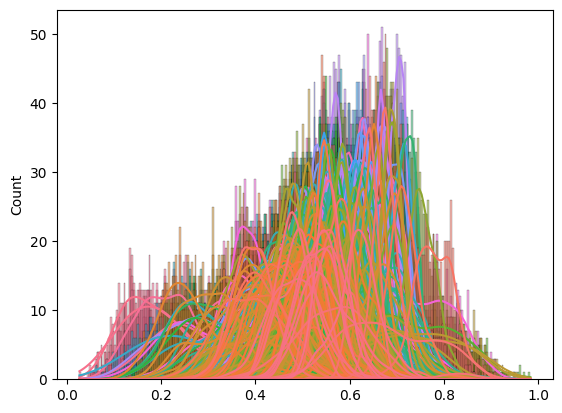

In [13]:
sns.histplot(Dataset_1,kde=True, legend=False)
plt.show()

Outliers are usually located in the tails of the distribution

<Axes: >

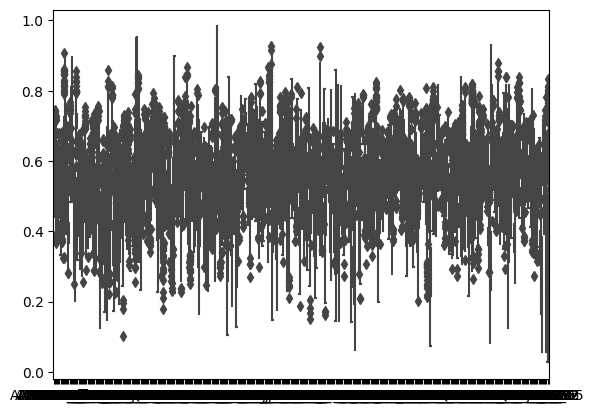

In [14]:
sns.boxplot(data=Dataset_1)#for quartile method

It can clearly see that there are a lot of outliers.

Choosing quartile method to find the specific outliers in the data

In [15]:
Dataset_1.describe()

ACTL6A_S5    ADAM9_S2  ADAMTS1_S5    ADCY7_S3    AIMP2_S5   ALKBH7_S5   
count  540.000000  540.000000  540.000000  540.000000  540.000000  540.000000  \
mean     0.562063    0.617497    0.549052    0.530075    0.532300    0.550593   
std      0.031346    0.046260    0.058148    0.039704    0.037663    0.045730   
min      0.454512    0.481747    0.367899    0.420165    0.394824    0.406076   
25%      0.541103    0.594717    0.509507    0.501417    0.505232    0.519779   
50%      0.559485    0.618027    0.544527    0.531558    0.535666    0.552652   
75%      0.581467    0.644837    0.586762    0.559147    0.560231    0.582331   
max      0.710251    0.746323    0.729066    0.678374    0.636284    0.679299   

       ALOX5AP_S3    AMPD3_S3   APITD1_S5    APOC1_S3  ...    WDR77_S5   
count  540.000000  540.000000  540.000000  540.000000  ...  540.000000  \
mean     0.482367    0.494148    0.478304    0.571891  ...    0.550695   
std      0.053319    0.044860    0.036284    0.087900  ...    0.030780   
min      0.331671    0.368469    0.322530    0.324714  ...    0.469474   
25%      0.444551    0.465861    0.452666    0.514803  ...    0.527979   
50%      0.484568    0.492815    0.478269    0.570587  ...    0.551934   
75%      0.520911    0.517119    0.501981    0.619868  ...    0.572067   
max      0.616650    0.682606    0.569738    0.908518  ...    0.648555   

         WIPF1_S3    WNT2B_S2    WNT8B_S2     WSB2_S5   ZWILCH_S5      ZYX_S2   
count  540.000000  540.000000  540.000000  540.000000  540.000000  540.000000  \
mean     0.567491    0.356629    0.210863    0.607607    0.494693    0.643181   
std      0.036571    0.074973    0.063109    0.034481    0.035625    0.026520   
min      0.445756    0.175897    0.055078    0.491753    0.393490    0.542554   
25%      0.541440    0.304264    0.164997    0.581120    0.468695    0.626757   
50%      0.571641    0.351196    0.209848    0.603842    0.493034    0.641369   
75%      0.595177    0.399560    0.253092    0.633591    0.519085    0.660907   
max      0.666154    0.611041    0.455048    0.704738    0.613592    0.745479   

          MMP3_S2      PLG_S5     RGS8_S5  
count  540.000000  540.000000  540.000000  
mean     0.320501    0.220009    0.191605  
std      0.130704    0.148883    0.078200  
min      0.056857    0.026909    0.046179  
25%      0.220523    0.138133    0.134756  
50%      0.286077    0.186938    0.178872  
75%      0.418848    0.232155    0.237335  
max      0.782070    0.833178    0.540641  

[8 rows x 440 columns]

Check the missing data situation before droped outliers

<Figure size 1000x600 with 0 Axes>

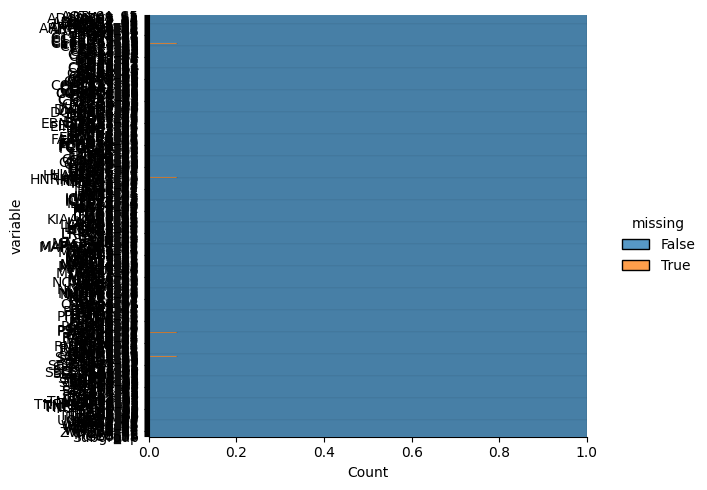

In [16]:
# show the missing data before delet the outliers
plt.figure(figsize=(10,6))
sns.displot(
    data=Dataset_1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Before drop the outliers the missing columns distribut like this

FInd the outliers location by Quartile Algorithm: upper quartile and lower quartile limits

In [17]:
#identify function for finding outliers
def find_outliers_IQR(df):
   q1=df.quantile(0.25)#1/4
   q3=df.quantile(0.75)#3/4
   IQR=q3-q1
   df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] =1 #easy to sum how many outliers 
   df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]=0
   return df

In [18]:
outliers = find_outliers_IQR(Dataset_1[Dataset_1.columns[0:-1]]) #get outliers location
outliers

C:\Users\murui\AppData\Local\Temp\ipykernel_38176\714981418.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] =1 #easy to sum how many outliers
C:\Users\murui\AppData\Local\Temp\ipykernel_38176\714981418.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] =1 #easy to sum how many outliers
C:\Users\murui\AppData\Local\Temp\ipykernel_38176\714981418.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_        0.0       0.0         0.0       0.0       0.0  \
TCGA.EW.A1OZ.BRCA.C1_        0.0       0.0         0.0       0.0       0.0   
TCGA.EY.A1GL.UCEC.C1_        0.0       0.0         0.0       0.0       0.0   
TCGA.EB.A5FP.SKCM.C1_        0.0       0.0         0.0       0.0       0.0   
TCGA.D1.A16D.UCEC.C1_        0.0       0.0         0.0       0.0       0.0   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_        0.0       0.0         0.0       0.0       0.0   
TCGA.SH.A7BC.MESO.C6_        0.0       0.0         0.0       0.0       0.0   
TCGA.EL.A3T9.THCA.C6_        0.0       0.0         0.0       0.0       0.0   
TCGA.A2.A4S1.BRCA.C6_        0.0       0.0         0.0       0.0       0.0   
TCGA.AR.A2LJ.BRCA.C6_        0.0       0.0         0.0       0.0       0.0   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_        0.0         0.0       0.0        0.0       0.0  \
TCGA.EW.A1OZ.BRCA.C1_        0.0         0.0       0.0        0.0       0.0   
TCGA.EY.A1GL.UCEC.C1_        0.0         0.0       0.0        0.0       0.0   
TCGA.EB.A5FP.SKCM.C1_        0.0         0.0       0.0        0.0       0.0   
TCGA.D1.A16D.UCEC.C1_        0.0         0.0       0.0        0.0       0.0   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_        0.0         0.0       0.0        0.0       0.0   
TCGA.SH.A7BC.MESO.C6_        0.0         0.0       0.0        0.0       0.0   
TCGA.EL.A3T9.THCA.C6_        0.0         0.0       0.0        0.0       0.0   
TCGA.A2.A4S1.BRCA.C6_        0.0         0.0       0.0        0.0       0.0   
TCGA.AR.A2LJ.BRCA.C6_        0.0         0.0       0.0        0.0       0.0   

                       ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2  WSB2_S5   
TCGA.HF.7136.STAD.C1_  ...       0.0       0.0       0.0       0.0      0.0  \
TCGA.EW.A1OZ.BRCA.C1_  ...       0.0       0.0       0.0       0.0      0.0   
TCGA.EY.A1GL.UCEC.C1_  ...       0.0       0.0       0.0       0.0      0.0   
TCGA.EB.A5FP.SKCM.C1_  ...       0.0       0.0       0.0       0.0      0.0   
TCGA.D1.A16D.UCEC.C1_  ...       0.0       0.0       0.0       0.0      0.0   
...                    ...       ...       ...       ...       ...      ...   
TCGA.43.2581.LUSC.C6_  ...       0.0       0.0       0.0       0.0      0.0   
TCGA.SH.A7BC.MESO.C6_  ...       0.0       0.0       1.0       0.0      0.0   
TCGA.EL.A3T9.THCA.C6_  ...       0.0       0.0       0.0       0.0      0.0   
TCGA.A2.A4S1.BRCA.C6_  ...       0.0       0.0       0.0       0.0      0.0   
TCGA.AR.A2LJ.BRCA.C6_  ...       0.0       0.0       0.0       0.0      0.0   

                       ZWILCH_S5  ZYX_S2  MMP3_S2  PLG_S5  RGS8_S5  
TCGA.HF.7136.STAD.C1_        0.0     0.0      0.0     0.0      0.0  
TCGA.EW.A1OZ.BRCA.C1_        0.0     0.0      0.0     0.0      0.0  
TCGA.EY.A1GL.UCEC.C1_        0.0     0.0      0.0     0.0      0.0  
TCGA.EB.A5FP.SKCM.C1_        0.0     0.0      0.0     0.0      0.0  
TCGA.D1.A16D.UCEC.C1_        0.0     0.0      0.0     0.0      0.0  
...                          ...     ...      ...     ...      ...  
TCGA.43.2581.LUSC.C6_        0.0     0.0      0.0     0.0      0.0  
TCGA.SH.A7BC.MESO.C6_        0.0     0.0      0.0     0.0      0.0  
TCGA.EL.A3T9.THCA.C6_        0.0     0.0      0.0     0.0      0.0  
TCGA.A2.A4S1.BRCA.C6_        0.0     0.0      0.0     0.0      0.0  
TCGA.AR.A2LJ.BRCA.C6_        0.0     0.0      0.0     0.0      0.0  

[540 rows x 440 columns]

In [19]:
#identify function to drop outliers return a dataset after cleanned
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)#1/4
   q3=df.quantile(0.75)#3/4
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] # only get data which is not outliers into dataset
   return not_outliers

Separate the original data from the cleaned areas and compare them later.

In [20]:
cleaned_data = drop_outliers_IQR(Dataset_1[Dataset_1.columns[0:-1]])
cleaned_data

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_   0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_   0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.EB.A5FP.SKCM.C1_   0.497918    0.362422  0.428469   0.544391  0.580780   
TCGA.D1.A16D.UCEC.C1_   0.556670    0.518468  0.510708   0.488154  0.585870   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.488698    0.592145  0.510097   0.408028  0.572360   
TCGA.SH.A7BC.MESO.C6_   0.523583    0.550000  0.501574   0.417098  0.594076   
TCGA.EL.A3T9.THCA.C6_   0.514959    0.532856  0.477059   0.474861  0.471344   
TCGA.A2.A4S1.BRCA.C6_   0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.AR.A2LJ.BRCA.C6_   0.603053    0.517177  0.453269   0.484431  0.650400   

                       ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5   
TCGA.HF.7136.STAD.C1_  ...  0.591241  0.557671  0.348506  0.210016  0.629423  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.544296  0.543131  0.271636  0.215562  0.588503   
TCGA.EY.A1GL.UCEC.C1_  ...  0.564828  0.537821  0.370267  0.256229  0.626342   
TCGA.EB.A5FP.SKCM.C1_  ...  0.582566  0.635673  0.360680  0.261153  0.612561   
TCGA.D1.A16D.UCEC.C1_  ...  0.592322  0.533510  0.332906  0.129106  0.609040   
...                    ...       ...       ...       ...       ...       ...   
TCGA.43.2581.LUSC.C6_  ...  0.524690  0.584858  0.256580  0.154807  0.574657   
TCGA.SH.A7BC.MESO.C6_  ...  0.520420  0.580386       NaN  0.185317  0.567794   
TCGA.EL.A3T9.THCA.C6_  ...  0.522743  0.587950  0.286881  0.189631  0.562508   
TCGA.A2.A4S1.BRCA.C6_  ...  0.524518  0.601901  0.340524  0.171785  0.541964   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.515673  0.563845  0.215693  0.201434  0.558991   

                       ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  
TCGA.HF.7136.STAD.C1_   0.515653  0.664831  0.548405  0.144132  0.156693  
TCGA.EW.A1OZ.BRCA.C1_   0.520022  0.661331  0.488972  0.129630  0.147665  
TCGA.EY.A1GL.UCEC.C1_   0.500481  0.650543  0.602704  0.236607  0.236607  
TCGA.EB.A5FP.SKCM.C1_   0.564331  0.620690  0.457935  0.261153  0.261153  
TCGA.D1.A16D.UCEC.C1_   0.482094  0.670960  0.389138  0.282479  0.151172  
...                          ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_   0.465805  0.654632  0.372903  0.098287  0.098287  
TCGA.SH.A7BC.MESO.C6_   0.471550  0.683370  0.354513  0.093081  0.093081  
TCGA.EL.A3T9.THCA.C6_   0.489268  0.645087  0.247726  0.172708  0.172708  
TCGA.A2.A4S1.BRCA.C6_   0.450655  0.643585  0.259902  0.171785  0.171785  
TCGA.AR.A2LJ.BRCA.C6_   0.462621  0.676615  0.476988  0.133939  0.133939  

[540 rows x 440 columns]

<Figure size 1000x600 with 0 Axes>

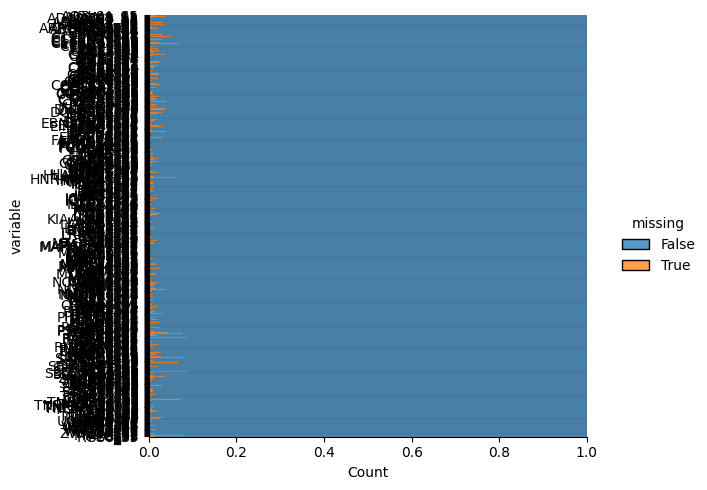

In [21]:
#show the missing data afer cleaning
plt.figure(figsize=(10,6))
sns.displot(
    data=cleaned_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

The outliers are removed to varying degrees for each feature.

Text(0.5, 1.0, 'cleaned')

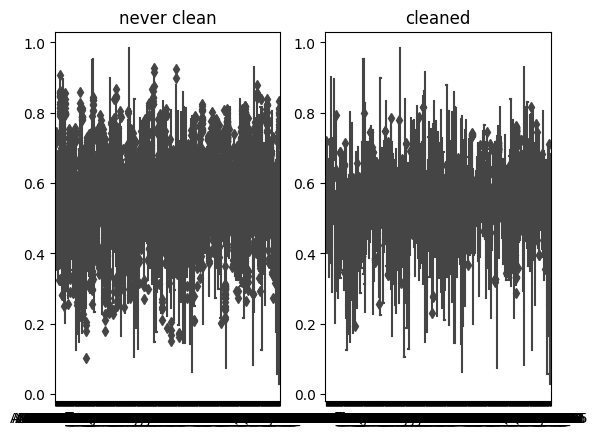

In [22]:
#compare in the plot
fig, axes = plt.subplots(1,2)
sns.boxplot(data=Dataset_1, ax=axes[0])#orginal data
sns.boxplot(data=cleaned_data, ax=axes[1])#without outliers
axes[0].set_title('never clean')
axes[1].set_title('cleaned')

It shows after cleaning the data, outliers have gone down a lot. However, the retention of outliers is not decided for the time being because some outliers contain important data content. I don't think they should be calculated separately for each feature and deleted completely. The Quartile Algorithm is traditional, but I don't think it's perfect for high-dimensional arrays.

Due to the choice of the Normalization method being affected by outliers and PCA when doing the dimensional reducing, it will do more compared to the cleaned and original data. Also, I will compare the traditional method and some methods using machine learning, which I think is more suitable for high-dimensional arrays.

In [23]:
# count the outliers
outliers.sum().sum()

2185.0

After Calculating, cleaned data drop 2185 data which is 0.92% orignial data.

Choosing some feature to show the change between orginal data and cleaned data

In [24]:
#shows situation for count of the outliers in each features
outliers.sum()

ACTL6A_S5      8.0
ADAM9_S2      21.0
ADAMTS1_S5     6.0
ADCY7_S3       1.0
AIMP2_S5       1.0
              ... 
ZWILCH_S5      2.0
ZYX_S2         8.0
MMP3_S2        1.0
PLG_S5        45.0
RGS8_S5        9.0
Length: 440, dtype: float64

Choose the 'PLG_S5' feature, 'APOC1_S3' feature and 'ACTL6A_S5' feature to plot the data distribution because it can be easier to observe in different situations: one is the feature has many outliers. Another one is the feature has seldom outliers. And compare original data and cleaned data.

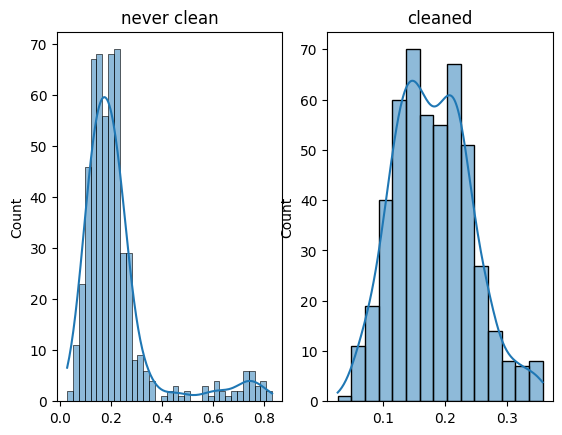

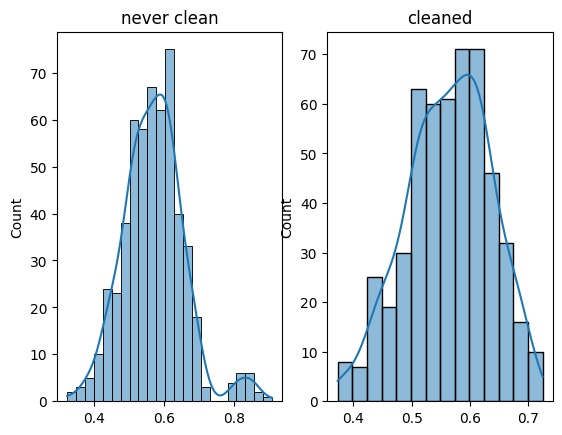

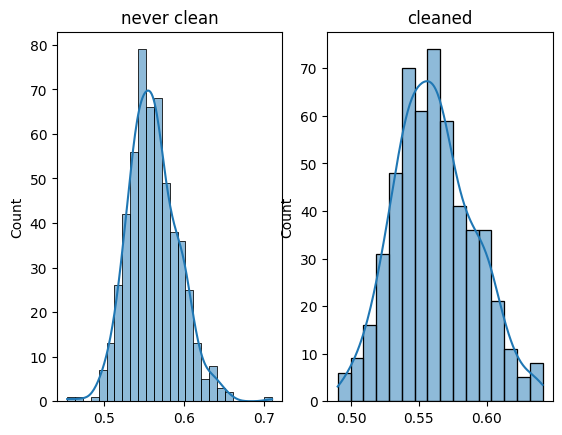

In [25]:
#plot for some features for have check 
fig, axes = plt.subplots(1,2)
sns.histplot(Dataset_1[['PLG_S5']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data[['PLG_S5']],kde=True, legend=False, ax=axes[1])
axes[0].set_title('never clean')
axes[1].set_title('cleaned')
fig, axes = plt.subplots(1,2)
sns.histplot(Dataset_1[['APOC1_S3']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data[['APOC1_S3']],kde=True, legend=False, ax=axes[1])
axes[0].set_title('never clean')
axes[1].set_title('cleaned')
fig, axes = plt.subplots(1,2)
sns.histplot(Dataset_1[['ACTL6A_S5']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data[['ACTL6A_S5']],kde=True, legend=False, ax=axes[1])
axes[0].set_title('never clean')
axes[1].set_title('cleaned')
plt.show()

Sometimes, the outliers include special significance. However, the PCA dimensionality reduction Algorithm is sensitive to outliers. Deleting the outliers benefits the stability of a model because of the equilibrium of a model. But dropping the outliers should be done with great care. Since IsolationForest Algortims can only work without missing data, I will supplement this and reevaluate the decision to keep or remove outliers after imputing missing values.

Conclusion: Through the deletion of repeated values, outliers and machine learning algorithms to clean the data, I think the most challenging thing is how to clean high-dimensional arrays because high-dimensional arrays of features will be more or less correlation; the traditional cleaning methods are not suitable. How to identify the decision to retain the data: sometimes outliers are indeed identified, but the problem of maintaining the problem is still a headache.

#### b. Missing Data Imputation

##### check missing data

In [26]:
# using isna() to check the missing data and summarise it
Dataset_1.isna().any()

ACTL6A_S5     False
ADAM9_S2      False
ADAMTS1_S5    False
ADCY7_S3      False
AIMP2_S5      False
              ...  
ZYX_S2        False
MMP3_S2       False
PLG_S5        False
RGS8_S5       False
Subgroup      False
Length: 441, dtype: bool

In [27]:
#shows the location of the missing data
Dataset_1[Dataset_1.columns[Dataset_1.isna().any()]]

C1orf54_S3   HN1L_S5  PTPRC_S3  SAMHD1_S3
TCGA.HF.7136.STAD.C1_    0.364874  0.611415  0.532904   0.530763
TCGA.EW.A1OZ.BRCA.C1_    0.421521  0.641031  0.525117   0.533921
TCGA.EY.A1GL.UCEC.C1_    0.457814  0.637443  0.424625   0.486925
TCGA.EB.A5FP.SKCM.C1_    0.427228  0.642142       NaN   0.463744
TCGA.D1.A16D.UCEC.C1_    0.398250  0.700416  0.493172   0.554316
...                           ...       ...       ...        ...
TCGA.43.2581.LUSC.C6_    0.351794  0.599456       NaN   0.591878
TCGA.SH.A7BC.MESO.C6_    0.425960  0.614321  0.582419   0.588247
TCGA.EL.A3T9.THCA.C6_    0.449813  0.602357  0.531815   0.544002
TCGA.A2.A4S1.BRCA.C6_         NaN  0.555404  0.533358   0.511731
TCGA.AR.A2LJ.BRCA.C6_    0.465609  0.616445  0.529782   0.515932

[540 rows x 4 columns]

In [28]:
cleaned_data[cleaned_data.columns[cleaned_data.isna().any()]]

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_   0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  AMPD3_S3  APITD1_S5  APOC1_S3  ARHGAP1_S2   
TCGA.HF.7136.STAD.C1_   0.462218  0.482923   0.418519  0.483556    0.595520  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416  0.428246   0.447287  0.588167    0.634261   
TCGA.EY.A1GL.UCEC.C1_   0.560062  0.529847   0.516928  0.500291    0.648068   
TCGA.EB.A5FP.SKCM.C1_   0.497918  0.428469   0.544391  0.580780    0.624863   
TCGA.D1.A16D.UCEC.C1_   0.556670  0.510708   0.488154  0.585870    0.674815   
...                          ...       ...        ...       ...         ...   
TCGA.43.2581.LUSC.C6_   0.488698  0.510097   0.408028  0.572360    0.607820   
TCGA.SH.A7BC.MESO.C6_   0.523583  0.501574   0.417098  0.594076    0.608866   
TCGA.EL.A3T9.THCA.C6_   0.514959  0.477059   0.474861  0.471344    0.642155   
TCGA.A2.A4S1.BRCA.C6_   0.507401  0.483158   0.441637  0.463836    0.601681   
TCGA.AR.A2LJ.BRCA.C6_   0.603053  0.453269   0.484431  0.650400    0.649493   

                       ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5   
TCGA.HF.7136.STAD.C1_  ...  0.591241  0.557671  0.348506  0.210016  0.629423  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.544296  0.543131  0.271636  0.215562  0.588503   
TCGA.EY.A1GL.UCEC.C1_  ...  0.564828  0.537821  0.370267  0.256229  0.626342   
TCGA.EB.A5FP.SKCM.C1_  ...  0.582566  0.635673  0.360680  0.261153  0.612561   
TCGA.D1.A16D.UCEC.C1_  ...  0.592322  0.533510  0.332906  0.129106  0.609040   
...                    ...       ...       ...       ...       ...       ...   
TCGA.43.2581.LUSC.C6_  ...  0.524690  0.584858  0.256580  0.154807  0.574657   
TCGA.SH.A7BC.MESO.C6_  ...  0.520420  0.580386       NaN  0.185317  0.567794   
TCGA.EL.A3T9.THCA.C6_  ...  0.522743  0.587950  0.286881  0.189631  0.562508   
TCGA.A2.A4S1.BRCA.C6_  ...  0.524518  0.601901  0.340524  0.171785  0.541964   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.515673  0.563845  0.215693  0.201434  0.558991   

                       ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  
TCGA.HF.7136.STAD.C1_   0.515653  0.664831  0.548405  0.144132  0.156693  
TCGA.EW.A1OZ.BRCA.C1_   0.520022  0.661331  0.488972  0.129630  0.147665  
TCGA.EY.A1GL.UCEC.C1_   0.500481  0.650543  0.602704  0.236607  0.236607  
TCGA.EB.A5FP.SKCM.C1_   0.564331  0.620690  0.457935  0.261153  0.261153  
TCGA.D1.A16D.UCEC.C1_   0.482094  0.670960  0.389138  0.282479  0.151172  
...                          ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_   0.465805  0.654632  0.372903  0.098287  0.098287  
TCGA.SH.A7BC.MESO.C6_   0.471550  0.683370  0.354513  0.093081  0.093081  
TCGA.EL.A3T9.THCA.C6_   0.489268  0.645087  0.247726  0.172708  0.172708  
TCGA.A2.A4S1.BRCA.C6_   0.450655  0.643585  0.259902  0.171785  0.171785  
TCGA.AR.A2LJ.BRCA.C6_   0.462621  0.676615  0.476988  0.133939  0.133939  

[540 rows x 351 columns]

In [29]:
#sum() total of the missing data 
#show count of the missing data in list of features
#Dataset_1.isnull().sum()
#shows total missing data in all dataset -> a number
Dataset_1.isnull().sum().sum()

140

In [30]:
#sum the missing data after cleaning
cleaned_data.isnull().sum().sum()

2326

There are 140 missing data in orignial dataset and 2327 missing data in cleaned dataset

In [31]:
# sumarize number in each features
Sum_of_missing = Dataset_1.isnull().sum()
print(Sum_of_missing[['CBX1_S5']],'\n',Sum_of_missing[['F3_S5']],'\n',Sum_of_missing[['IGFBP3_S2']],'\n',Sum_of_missing[['IL7R_S3']])

CBX1_S5    0
dtype: int64 
 F3_S5    0
dtype: int64 
 IGFBP3_S2    0
dtype: int64 
 IL7R_S3    0
dtype: int64


##### Imputation

The mice imputations are calculated as per logical reasoning(linear regression) with data and its relation to other features. It's commonly used in situations where data is missing at random, and it can help prevent biases and improve the performance of subsequent data analysis, such as outlier detection or machine learning. I will do IsolationForest Algortims later this method is the best method to use.

In [32]:
# Apply mice imputation (Multiple Imputation by Chained Equation)
mice_imputer = IterativeImputer()

for data_c in Dataset_1.columns[Dataset_1.isna().any()]:
    Dataset_1[[data_c]] = mice_imputer.fit_transform(Dataset_1[[data_c]])

C:\Users\murui\AppData\Local\Temp\ipykernel_38176\3014042716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_1[[data_c]] = mice_imputer.fit_transform(Dataset_1[[data_c]])
C:\Users\murui\AppData\Local\Temp\ipykernel_38176\3014042716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_1[[data_c]] = mice_imputer.fit_transform(Dataset_1[[data_c]])
C:\Users\murui\AppData\Local\Temp\ipykernel_38176\3014042716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [33]:
mice_imputer_c = IterativeImputer()

for data_c in cleaned_data.columns[cleaned_data.isna().any()]:
    cleaned_data[[data_c]] = mice_imputer_c.fit_transform(cleaned_data[[data_c]])


check the missing data after imputation

In [34]:
Dataset_1.isnull().values.any()

False

In [35]:
cleaned_data.isnull().values.any()

False

In [36]:
Dataset_1.isnull().sum().sum()

0

In [37]:
cleaned_data.isnull().sum().sum()

0

There is no missing data in dataset now

In [38]:
Dataset_1

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_   0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_   0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.EB.A5FP.SKCM.C1_   0.497918    0.362422  0.428469   0.544391  0.580780   
TCGA.D1.A16D.UCEC.C1_   0.556670    0.518468  0.510708   0.488154  0.585870   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.488698    0.592145  0.510097   0.408028  0.572360   
TCGA.SH.A7BC.MESO.C6_   0.523583    0.550000  0.501574   0.417098  0.594076   
TCGA.EL.A3T9.THCA.C6_   0.514959    0.532856  0.477059   0.474861  0.471344   
TCGA.A2.A4S1.BRCA.C6_   0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.AR.A2LJ.BRCA.C6_   0.603053    0.517177  0.453269   0.484431  0.650400   

                       ...  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  ZWILCH_S5   
TCGA.HF.7136.STAD.C1_  ...  0.557671  0.348506  0.210016  0.629423   0.515653  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.543131  0.271636  0.215562  0.588503   0.520022   
TCGA.EY.A1GL.UCEC.C1_  ...  0.537821  0.370267  0.256229  0.626342   0.500481   
TCGA.EB.A5FP.SKCM.C1_  ...  0.635673  0.360680  0.261153  0.612561   0.564331   
TCGA.D1.A16D.UCEC.C1_  ...  0.533510  0.332906  0.129106  0.609040   0.482094   
...                    ...       ...       ...       ...       ...        ...   
TCGA.43.2581.LUSC.C6_  ...  0.584858  0.256580  0.154807  0.574657   0.465805   
TCGA.SH.A7BC.MESO.C6_  ...  0.580386  0.560368  0.185317  0.567794   0.471550   
TCGA.EL.A3T9.THCA.C6_  ...  0.587950  0.286881  0.189631  0.562508   0.489268   
TCGA.A2.A4S1.BRCA.C6_  ...  0.601901  0.340524  0.171785  0.541964   0.450655   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.563845  0.215693  0.201434  0.558991   0.462621   

                         ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  Subgroup  
TCGA.HF.7136.STAD.C1_  0.664831  0.548405  0.144132  0.156693        C1  
TCGA.EW.A1OZ.BRCA.C1_  0.661331  0.488972  0.129630  0.147665        C1  
TCGA.EY.A1GL.UCEC.C1_  0.650543  0.602704  0.236607  0.236607        C1  
TCGA.EB.A5FP.SKCM.C1_  0.620690  0.457935  0.261153  0.261153        C1  
TCGA.D1.A16D.UCEC.C1_  0.670960  0.389138  0.282479  0.151172        C1  
...                         ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_  0.654632  0.372903  0.098287  0.098287        C6  
TCGA.SH.A7BC.MESO.C6_  0.683370  0.354513  0.093081  0.093081        C6  
TCGA.EL.A3T9.THCA.C6_  0.645087  0.247726  0.172708  0.172708        C6  
TCGA.A2.A4S1.BRCA.C6_  0.643585  0.259902  0.171785  0.171785        C6  
TCGA.AR.A2LJ.BRCA.C6_  0.676615  0.476988  0.133939  0.133939        C6  

[540 rows x 441 columns]

In [39]:
cleaned_data

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_   0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_   0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.EB.A5FP.SKCM.C1_   0.497918    0.362422  0.428469   0.544391  0.580780   
TCGA.D1.A16D.UCEC.C1_   0.556670    0.518468  0.510708   0.488154  0.585870   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.488698    0.592145  0.510097   0.408028  0.572360   
TCGA.SH.A7BC.MESO.C6_   0.523583    0.550000  0.501574   0.417098  0.594076   
TCGA.EL.A3T9.THCA.C6_   0.514959    0.532856  0.477059   0.474861  0.471344   
TCGA.A2.A4S1.BRCA.C6_   0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.AR.A2LJ.BRCA.C6_   0.603053    0.517177  0.453269   0.484431  0.650400   

                       ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5   
TCGA.HF.7136.STAD.C1_  ...  0.591241  0.557671  0.348506  0.210016  0.629423  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.544296  0.543131  0.271636  0.215562  0.588503   
TCGA.EY.A1GL.UCEC.C1_  ...  0.564828  0.537821  0.370267  0.256229  0.626342   
TCGA.EB.A5FP.SKCM.C1_  ...  0.582566  0.635673  0.360680  0.261153  0.612561   
TCGA.D1.A16D.UCEC.C1_  ...  0.592322  0.533510  0.332906  0.129106  0.609040   
...                    ...       ...       ...       ...       ...       ...   
TCGA.43.2581.LUSC.C6_  ...  0.524690  0.584858  0.256580  0.154807  0.574657   
TCGA.SH.A7BC.MESO.C6_  ...  0.520420  0.580386  0.352507  0.185317  0.567794   
TCGA.EL.A3T9.THCA.C6_  ...  0.522743  0.587950  0.286881  0.189631  0.562508   
TCGA.A2.A4S1.BRCA.C6_  ...  0.524518  0.601901  0.340524  0.171785  0.541964   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.515673  0.563845  0.215693  0.201434  0.558991   

                       ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  
TCGA.HF.7136.STAD.C1_   0.515653  0.664831  0.548405  0.144132  0.156693  
TCGA.EW.A1OZ.BRCA.C1_   0.520022  0.661331  0.488972  0.129630  0.147665  
TCGA.EY.A1GL.UCEC.C1_   0.500481  0.650543  0.602704  0.236607  0.236607  
TCGA.EB.A5FP.SKCM.C1_   0.564331  0.620690  0.457935  0.261153  0.261153  
TCGA.D1.A16D.UCEC.C1_   0.482094  0.670960  0.389138  0.282479  0.151172  
...                          ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_   0.465805  0.654632  0.372903  0.098287  0.098287  
TCGA.SH.A7BC.MESO.C6_   0.471550  0.683370  0.354513  0.093081  0.093081  
TCGA.EL.A3T9.THCA.C6_   0.489268  0.645087  0.247726  0.172708  0.172708  
TCGA.A2.A4S1.BRCA.C6_   0.450655  0.643585  0.259902  0.171785  0.171785  
TCGA.AR.A2LJ.BRCA.C6_   0.462621  0.676615  0.476988  0.133939  0.133939  

[540 rows x 440 columns]

##### Using IsolationForest Algortims to Estimate Outliers

Using machine learning method to find the outliers which suit to high dimensional data 

In [40]:
data = Dataset_1
# Separate features and labelling
X = data.drop(['Subgroup'], axis=1)  # 440 features
y = data['Subgroup']  # subgroup 

# create Isolation Forest model and training
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predict outliers
y_pred = model.predict(X)

outlier_indices = X.index[y_pred == -1]

# let outliers to NaN
X_cleaned = X.copy()
X_cleaned.loc[outlier_indices] = None


cleaned_data_2 = pd.concat([X_cleaned, y], axis=1)
cleaned_group_labels = cleaned_data_2['Subgroup']
cleaned_data_2 = cleaned_data_2.drop(outlier_indices)

#cleaned_data.to_csv('cleaned_data.csv', index=False)

In [41]:
outlier_indices.value_counts().sum()

27

In [42]:
cleaned_data_2

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
TCGA.R6.A8W8.ESCA.C1_   0.604241  0.683214    0.518696  0.568172  0.529827   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_   0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.D1.A16D.UCEC.C1_   0.556670    0.518468  0.510708   0.488154  0.585870   
TCGA.R6.A8W8.ESCA.C1_   0.508240    0.425075  0.463861   0.503452  0.447875   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.488698    0.592145  0.510097   0.408028  0.572360   
TCGA.SH.A7BC.MESO.C6_   0.523583    0.550000  0.501574   0.417098  0.594076   
TCGA.EL.A3T9.THCA.C6_   0.514959    0.532856  0.477059   0.474861  0.471344   
TCGA.A2.A4S1.BRCA.C6_   0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.AR.A2LJ.BRCA.C6_   0.603053    0.517177  0.453269   0.484431  0.650400   

                       ...  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  ZWILCH_S5   
TCGA.HF.7136.STAD.C1_  ...  0.557671  0.348506  0.210016  0.629423   0.515653  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.543131  0.271636  0.215562  0.588503   0.520022   
TCGA.EY.A1GL.UCEC.C1_  ...  0.537821  0.370267  0.256229  0.626342   0.500481   
TCGA.D1.A16D.UCEC.C1_  ...  0.533510  0.332906  0.129106  0.609040   0.482094   
TCGA.R6.A8W8.ESCA.C1_  ...  0.524072  0.318327  0.246978  0.597891   0.568461   
...                    ...       ...       ...       ...       ...        ...   
TCGA.43.2581.LUSC.C6_  ...  0.584858  0.256580  0.154807  0.574657   0.465805   
TCGA.SH.A7BC.MESO.C6_  ...  0.580386  0.560368  0.185317  0.567794   0.471550   
TCGA.EL.A3T9.THCA.C6_  ...  0.587950  0.286881  0.189631  0.562508   0.489268   
TCGA.A2.A4S1.BRCA.C6_  ...  0.601901  0.340524  0.171785  0.541964   0.450655   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.563845  0.215693  0.201434  0.558991   0.462621   

                         ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  Subgroup  
TCGA.HF.7136.STAD.C1_  0.664831  0.548405  0.144132  0.156693        C1  
TCGA.EW.A1OZ.BRCA.C1_  0.661331  0.488972  0.129630  0.147665        C1  
TCGA.EY.A1GL.UCEC.C1_  0.650543  0.602704  0.236607  0.236607        C1  
TCGA.D1.A16D.UCEC.C1_  0.670960  0.389138  0.282479  0.151172        C1  
TCGA.R6.A8W8.ESCA.C1_  0.601357  0.570034  0.186503  0.183873        C1  
...                         ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_  0.654632  0.372903  0.098287  0.098287        C6  
TCGA.SH.A7BC.MESO.C6_  0.683370  0.354513  0.093081  0.093081        C6  
TCGA.EL.A3T9.THCA.C6_  0.645087  0.247726  0.172708  0.172708        C6  
TCGA.A2.A4S1.BRCA.C6_  0.643585  0.259902  0.171785  0.171785        C6  
TCGA.AR.A2LJ.BRCA.C6_  0.676615  0.476988  0.133939  0.133939        C6  

[513 rows x 441 columns]

In [43]:
cleaned_data

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.592349  0.628634    0.570785  0.536637  0.509823  \
TCGA.EW.A1OZ.BRCA.C1_   0.616708  0.589806    0.546915  0.522103  0.523893   
TCGA.EY.A1GL.UCEC.C1_   0.591583  0.601375    0.530573  0.470164  0.573793   
TCGA.EB.A5FP.SKCM.C1_   0.604189  0.586198    0.566644  0.523076  0.575625   
TCGA.D1.A16D.UCEC.C1_   0.545903  0.632497    0.587917  0.533486  0.540958   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.544662  0.620647    0.575653  0.557788  0.515838   
TCGA.SH.A7BC.MESO.C6_   0.527214  0.635277    0.626745  0.563070  0.503132   
TCGA.EL.A3T9.THCA.C6_   0.538555  0.600622    0.599145  0.549116  0.533807   
TCGA.A2.A4S1.BRCA.C6_   0.513619  0.599382    0.589908  0.543182  0.478895   
TCGA.AR.A2LJ.BRCA.C6_   0.540358  0.551918    0.526153  0.489545  0.518348   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.462218    0.443087  0.482923   0.418519  0.483556  \
TCGA.EW.A1OZ.BRCA.C1_   0.545416    0.518862  0.428246   0.447287  0.588167   
TCGA.EY.A1GL.UCEC.C1_   0.560062    0.408029  0.529847   0.516928  0.500291   
TCGA.EB.A5FP.SKCM.C1_   0.497918    0.362422  0.428469   0.544391  0.580780   
TCGA.D1.A16D.UCEC.C1_   0.556670    0.518468  0.510708   0.488154  0.585870   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.488698    0.592145  0.510097   0.408028  0.572360   
TCGA.SH.A7BC.MESO.C6_   0.523583    0.550000  0.501574   0.417098  0.594076   
TCGA.EL.A3T9.THCA.C6_   0.514959    0.532856  0.477059   0.474861  0.471344   
TCGA.A2.A4S1.BRCA.C6_   0.507401    0.570468  0.483158   0.441637  0.463836   
TCGA.AR.A2LJ.BRCA.C6_   0.603053    0.517177  0.453269   0.484431  0.650400   

                       ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5   
TCGA.HF.7136.STAD.C1_  ...  0.591241  0.557671  0.348506  0.210016  0.629423  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.544296  0.543131  0.271636  0.215562  0.588503   
TCGA.EY.A1GL.UCEC.C1_  ...  0.564828  0.537821  0.370267  0.256229  0.626342   
TCGA.EB.A5FP.SKCM.C1_  ...  0.582566  0.635673  0.360680  0.261153  0.612561   
TCGA.D1.A16D.UCEC.C1_  ...  0.592322  0.533510  0.332906  0.129106  0.609040   
...                    ...       ...       ...       ...       ...       ...   
TCGA.43.2581.LUSC.C6_  ...  0.524690  0.584858  0.256580  0.154807  0.574657   
TCGA.SH.A7BC.MESO.C6_  ...  0.520420  0.580386  0.352507  0.185317  0.567794   
TCGA.EL.A3T9.THCA.C6_  ...  0.522743  0.587950  0.286881  0.189631  0.562508   
TCGA.A2.A4S1.BRCA.C6_  ...  0.524518  0.601901  0.340524  0.171785  0.541964   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.515673  0.563845  0.215693  0.201434  0.558991   

                       ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  
TCGA.HF.7136.STAD.C1_   0.515653  0.664831  0.548405  0.144132  0.156693  
TCGA.EW.A1OZ.BRCA.C1_   0.520022  0.661331  0.488972  0.129630  0.147665  
TCGA.EY.A1GL.UCEC.C1_   0.500481  0.650543  0.602704  0.236607  0.236607  
TCGA.EB.A5FP.SKCM.C1_   0.564331  0.620690  0.457935  0.261153  0.261153  
TCGA.D1.A16D.UCEC.C1_   0.482094  0.670960  0.389138  0.282479  0.151172  
...                          ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_   0.465805  0.654632  0.372903  0.098287  0.098287  
TCGA.SH.A7BC.MESO.C6_   0.471550  0.683370  0.354513  0.093081  0.093081  
TCGA.EL.A3T9.THCA.C6_   0.489268  0.645087  0.247726  0.172708  0.172708  
TCGA.A2.A4S1.BRCA.C6_   0.450655  0.643585  0.259902  0.171785  0.171785  
TCGA.AR.A2LJ.BRCA.C6_   0.462621  0.676615  0.476988  0.133939  0.133939  

[540 rows x 440 columns]

In [44]:
cleaned_data_2[cleaned_data_2.columns[0:-1]].max().max()

0.983192666

In [45]:
cleaned_data[cleaned_data.columns[0:-1]].max().max()

0.983192666

In [46]:
cleaned_data_2[cleaned_data_2.columns[0:-1]].min().min()

0.026909471

In [47]:
cleaned_data[cleaned_data.columns[0:-1]].min().min()

0.026909471

It shows two type to clean data will not effect the min and max for the data

Compare orginal data cleaned data by Quartile Algorithm and cleaned data by IsolationForest Algortims

Text(0.5, 1.0, 'clean_Q')

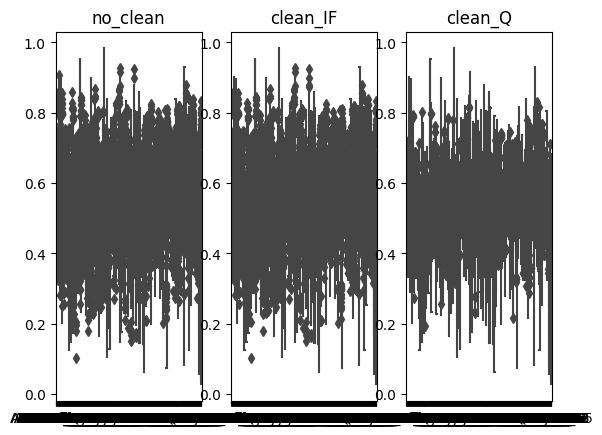

In [48]:
#compare in the plot
fig, axes = plt.subplots(1,3)
sns.boxplot(data=Dataset_1, ax=axes[0])
sns.boxplot(data=cleaned_data_2, ax=axes[1])
sns.boxplot(data=cleaned_data, ax=axes[2])
axes[0].set_title('no_clean')
axes[1].set_title('clean_IF')
axes[2].set_title('clean_Q')

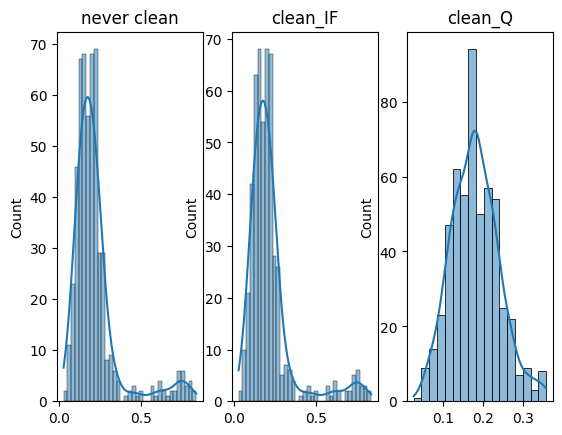

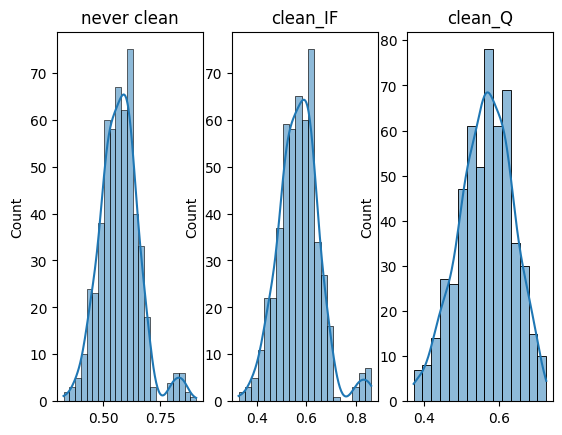

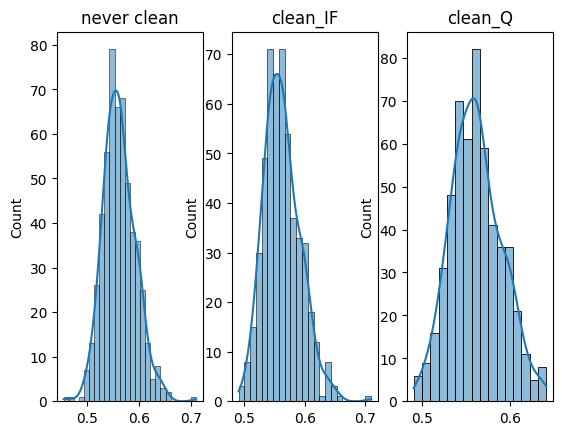

In [49]:
#plot for some features for have check 
fig, axes = plt.subplots(1,3)
sns.histplot(Dataset_1[['PLG_S5']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data_2[['PLG_S5']],kde=True, legend=False, ax=axes[1])
sns.histplot(cleaned_data[['PLG_S5']],kde=True, legend=False, ax=axes[2])
axes[0].set_title('never clean')
axes[1].set_title('clean_IF')
axes[2].set_title('clean_Q')
fig, axes = plt.subplots(1,3)
sns.histplot(Dataset_1[['APOC1_S3']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data_2[['APOC1_S3']],kde=True, legend=False, ax=axes[1])
sns.histplot(cleaned_data[['APOC1_S3']],kde=True, legend=False, ax=axes[2])
axes[0].set_title('never clean')
axes[1].set_title('clean_IF')
axes[2].set_title('clean_Q')
fig, axes = plt.subplots(1,3)
sns.histplot(Dataset_1[['ACTL6A_S5']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data_2[['ACTL6A_S5']],kde=True, legend=False, ax=axes[1])
sns.histplot(cleaned_data[['ACTL6A_S5']],kde=True, legend=False, ax=axes[2])
axes[0].set_title('never clean')
axes[1].set_title('clean_IF')
axes[2].set_title('clean_Q')
plt.show()

Because Isolation Forest Algorithm is inherently a method for detecting outliers and is well-suited for high-dimensional data, I believe the outliers it finds are more reasonable. In high-dimensional datasets, challenges can be related to what's known as the 'curse of dimensionality,' making traditional outlier detection methods less effective. Isolation Forest Algorithm, which predicts outliers through random sampling while considering all the features together, is more suitable than calcuate it one by one. It doesn't just look at a single feature to assess the range of each sample in that feature, as single-feature-based methods do.

Some points may appear as outliers when viewed in the context of a single feature, but when considering all the features collectively, they don't exhibit apparent outlier behaviour. I believe that this is why visualisations of the Isolation Forest's result may sometimes make some points seem like outliers. The reason is that these visualisations show the data distribution by breaking it down feature by feature, even in high-dimensional data with 440 

Also, outliers may contain useful information, and removing outliers should be done carefully rather than across the board, so I think the isolated forest cleaned data is more in line with eliminating the data that needs to be released rather than across the board, like traditional quartile algorithms.

I chose to remove the outliers because they have a significant impact on models like PCA, which is a dimensionality reduction model, and they can lead to model instability and affect the performance of machine learning algorithms.

Conclusion: Again, it's a matter of dimensionality, and high-dimensional arrays make many traditional methods less applicable.

#### c. Normalisation

I cleaned the outliers by isolated forest algorithms because that is more suitable for high-dimensional arrays. I observed that the maximum and minimum values did not change in both cleaning methods.

In [50]:
#formal the data cause the subgroup are object cannot calculate
features = Dataset_1.columns[0:-1]
x = cleaned_data_2.loc[:,features].values
y = Dataset_1.loc[:,['Subgroup']].values

In [51]:
x

array([[0.59234916, 0.62863443, 0.57078532, ..., 0.54840526, 0.14413165,
        0.15669266],
       [0.61670755, 0.58980588, 0.54691471, ..., 0.48897231, 0.12963003,
        0.14766489],
       [0.59158323, 0.60137506, 0.53057323, ..., 0.60270384, 0.23660706,
        0.23660706],
       ...,
       [0.53855485, 0.60062186, 0.5991449 , ..., 0.24772623, 0.17270843,
        0.17270843],
       [0.51361922, 0.59938179, 0.58990848, ..., 0.25990241, 0.1717848 ,
        0.1717848 ],
       [0.54035758, 0.55191784, 0.52615256, ..., 0.47698793, 0.13393862,
        0.13393862]])

In [52]:
#check data type
x.dtype

dtype('float64')

In [53]:
Dataset_max = np.amax(x)
Dataset_max

0.983192666

In [54]:
Dataset_min = np.amin(x)
Dataset_min

0.026909471

All data between 0 to 1

plot the data for observation

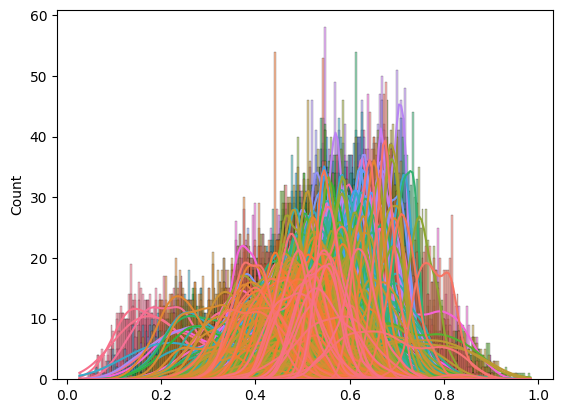

In [55]:
sns.histplot(x,kde=True,legend=False)
plt.show()

Checking distribution:

In [56]:
#Shapiro-Wilk Test: a statistical test that can be used to determine whether a dataset follows a normal distribution.
statistic, p_value = stats.shapiro(x)
if p_value > 0.05:
    print("Data follows a normal distribution")
else:
    print("Data does not follow a normal distribution")

Data does not follow a normal distribution


C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because the data does not follow a normal distribution, we will do the NMF which is only operate positive data and I have drop the outliers, I choose MinMaxScaler rather than StandardScaler

In [57]:
#apply MinMax
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [58]:
X_scaled

array([[0.46420631, 0.55301778, 0.55043053, ..., 0.67779844, 0.14538856,
        0.22350296],
       [0.5749009 , 0.40554712, 0.48263009, ..., 0.5958461 , 0.12740246,
        0.20524521],
       [0.4607256 , 0.44948682, 0.43621486, ..., 0.75267098, 0.26008414,
        0.38512169],
       ...,
       [0.21974274, 0.44662618, 0.63098116, ..., 0.26319088, 0.18083183,
        0.25589323],
       [0.10642494, 0.4419164 , 0.60474664, ..., 0.27998066, 0.17968626,
        0.25402527],
       [0.22793511, 0.26164852, 0.42365869, ..., 0.57932079, 0.13274633,
        0.17748523]])

In [59]:
np.amax(X_scaled)

1.0000000000000004

In [60]:
np.amin(X_scaled)

0.0

In [61]:
X_scaled.shape

(513, 440)

Formatting data with index and column to facilitate later use of standardised data

In [62]:
Dataset_sd = pd.DataFrame(data=X_scaled,
                          columns=cleaned_data_2.columns[0:-1],
                          index=cleaned_data_2.index)
Dataset_sd = pd.concat([Dataset_sd,cleaned_data_2[['Subgroup']]], axis=1)
Dataset_sd

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5   
TCGA.HF.7136.STAD.C1_   0.464206  0.553018    0.550431  0.422275  0.401367  \
TCGA.EW.A1OZ.BRCA.C1_   0.574901  0.405547    0.482630  0.363034  0.470152   
TCGA.EY.A1GL.UCEC.C1_   0.460726  0.449487    0.436215  0.151328  0.714113   
TCGA.D1.A16D.UCEC.C1_   0.253135  0.567689    0.599091  0.409430  0.553581   
TCGA.R6.A8W8.ESCA.C1_   0.518248  0.760312    0.402481  0.550812  0.499165   
...                          ...       ...         ...       ...       ...   
TCGA.43.2581.LUSC.C6_   0.247497  0.522681    0.564256  0.508487  0.430773   
TCGA.SH.A7BC.MESO.C6_   0.168205  0.578246    0.709375  0.530017  0.368653   
TCGA.EL.A3T9.THCA.C6_   0.219743  0.446626    0.630981  0.473138  0.518621   
TCGA.A2.A4S1.BRCA.C6_   0.106425  0.441916    0.604747  0.448950  0.250162   
TCGA.AR.A2LJ.BRCA.C6_   0.227935  0.261649    0.423659  0.230325  0.443044   

                       ALKBH7_S5  ALOX5AP_S3  AMPD3_S3  APITD1_S5  APOC1_S3   
TCGA.HF.7136.STAD.C1_   0.176712    0.390964  0.364345   0.395560  0.295254  \
TCGA.EW.A1OZ.BRCA.C1_   0.514156    0.656861  0.190290   0.514111  0.489703   
TCGA.EY.A1GL.UCEC.C1_   0.573561    0.267944  0.513717   0.801093  0.326360   
TCGA.D1.A16D.UCEC.C1_   0.559803    0.655478  0.452793   0.682517  0.485432   
TCGA.R6.A8W8.ESCA.C1_   0.363376    0.327758  0.303664   0.745557  0.228929   
...                          ...         ...       ...        ...       ...   
TCGA.43.2581.LUSC.C6_   0.284113    0.914014  0.450848   0.352329  0.460321   
TCGA.SH.A7BC.MESO.C6_   0.425604    0.766126  0.423715   0.389704  0.500686   
TCGA.EL.A3T9.THCA.C6_   0.390625    0.705965  0.345678   0.627741  0.272554   
TCGA.A2.A4S1.BRCA.C6_   0.359972    0.837949  0.365091   0.490826  0.258597   
TCGA.AR.A2LJ.BRCA.C6_   0.747928    0.650948  0.269944   0.667177  0.605381   

                       ...  WIPF1_S3  WNT2B_S2  WNT8B_S2   WSB2_S5  ZWILCH_S5   
TCGA.HF.7136.STAD.C1_  ...  0.553260  0.396224  0.387375  0.646382   0.555027  \
TCGA.EW.A1OZ.BRCA.C1_  ...  0.481381  0.219441  0.401239  0.454258   0.574876   
TCGA.EY.A1GL.UCEC.C1_  ...  0.455133  0.446272  0.502915  0.631917   0.486097   
TCGA.D1.A16D.UCEC.C1_  ...  0.433820  0.360347  0.185082  0.550679   0.402559   
TCGA.R6.A8W8.ESCA.C1_  ...  0.387164  0.326819  0.479786  0.498336   0.794955   
...                    ...       ...       ...       ...       ...        ...   
TCGA.43.2581.LUSC.C6_  ...  0.687661  0.184814  0.249341  0.389247   0.328550   
TCGA.SH.A7BC.MESO.C6_  ...  0.665557  0.883463  0.325622  0.357024   0.354655   
TCGA.EL.A3T9.THCA.C6_  ...  0.702948  0.254499  0.336407  0.332205   0.435153   
TCGA.A2.A4S1.BRCA.C6_  ...  0.771916  0.377868  0.291789  0.235748   0.259721   
TCGA.AR.A2LJ.BRCA.C6_  ...  0.583781  0.090782  0.365918  0.315691   0.314086   

                         ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  Subgroup  
TCGA.HF.7136.STAD.C1_  0.510994  0.677798  0.145389  0.223503        C1  
TCGA.EW.A1OZ.BRCA.C1_  0.489773  0.595846  0.127402  0.205245        C1  
TCGA.EY.A1GL.UCEC.C1_  0.424361  0.752671  0.260084  0.385122        C1  
TCGA.D1.A16D.UCEC.C1_  0.548159  0.458184  0.316978  0.212338        C1  
TCGA.R6.A8W8.ESCA.C1_  0.126130  0.707623  0.197941  0.278473        C1  
...                         ...       ...       ...       ...       ...  
TCGA.43.2581.LUSC.C6_  0.449154  0.435797  0.088529  0.105384        C6  
TCGA.SH.A7BC.MESO.C6_  0.623405  0.410439  0.082071  0.094855        C6  
TCGA.EL.A3T9.THCA.C6_  0.391279  0.263191  0.180832  0.255893        C6  
TCGA.A2.A4S1.BRCA.C6_  0.382173  0.279981  0.179686  0.254025        C6  
TCGA.AR.A2LJ.BRCA.C6_  0.582450  0.579321  0.132746  0.177485        C6  

[513 rows x 441 columns]

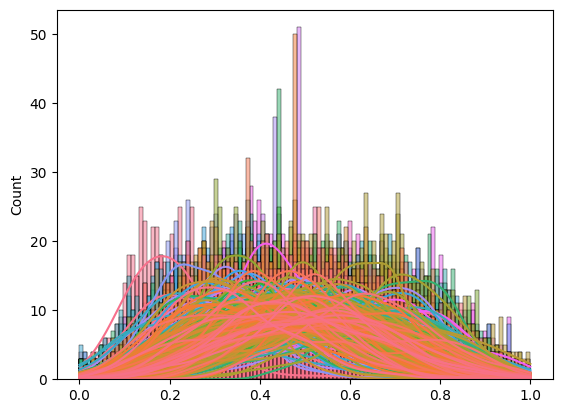

In [63]:
sns.histplot(X_scaled,kde=True,legend=False)
plt.show()

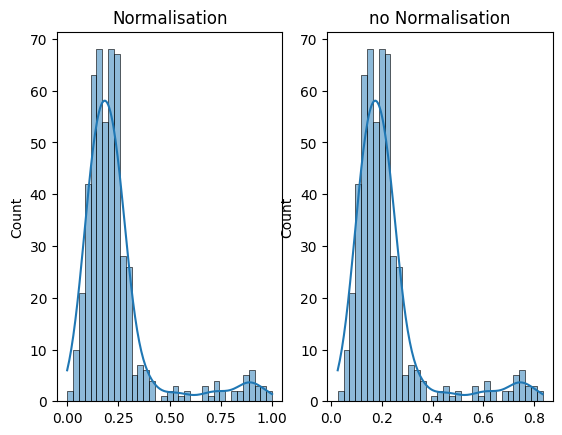

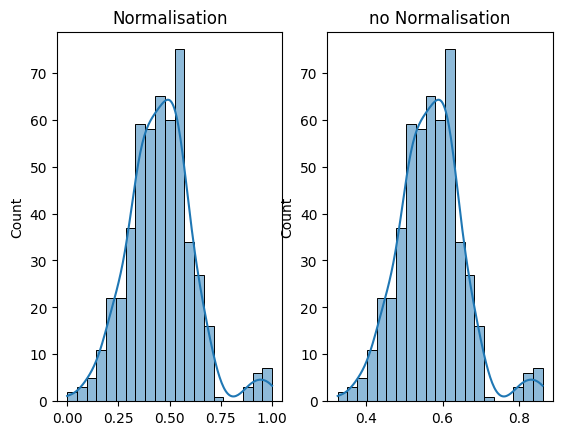

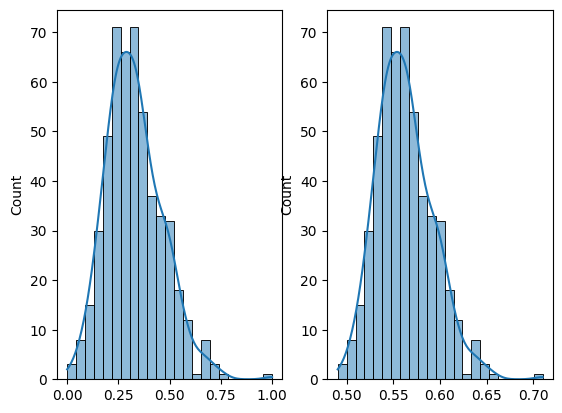

Text(0.5, 1.0, 'no Normalisation')

In [64]:
#plot for some features for have check 
fig, axes = plt.subplots(1,2)
sns.histplot(Dataset_sd[['PLG_S5']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data_2[['PLG_S5']],kde=True, legend=False, ax=axes[1])
axes[0].set_title('Normalisation')
axes[1].set_title('no Normalisation')
fig, axes = plt.subplots(1,2)
sns.histplot(Dataset_sd[['APOC1_S3']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data_2[['APOC1_S3']],kde=True, legend=False, ax=axes[1])
axes[0].set_title('Normalisation')
axes[1].set_title('no Normalisation')
fig, axes = plt.subplots(1,2)
sns.histplot(Dataset_sd[['ACTL6A_S5']],kde=True, legend=False, ax=axes[0])
sns.histplot(cleaned_data_2[['ACTL6A_S5']],kde=True, legend=False, ax=axes[1])
plt.show()
axes[0].set_title('Normalisation')
axes[1].set_title('no Normalisation')

Conclusion: Outliers strongly influence the choice of normalisation method, as some normalisation models are strongly influenced by outliers. I am concerned about the maximum and minimum values and the outliers, and the data range.

### Non-negative Matrix Factorization(NMF)

#### a. Application of NMF

Format the dataset firstly, because the data using by NMF need to transform standard dataset

In [65]:
# get dataset from standared dataset and format it.
Dataset_nmf = Dataset_sd[Dataset_sd.columns[0:-1]].T 
Dataset_nmf 

TCGA.HF.7136.STAD.C1_  TCGA.EW.A1OZ.BRCA.C1_   
ACTL6A_S5                0.464206               0.574901  \
ADAM9_S2                 0.553018               0.405547   
ADAMTS1_S5               0.550431               0.482630   
ADCY7_S3                 0.422275               0.363034   
AIMP2_S5                 0.401367               0.470152   
...                           ...                    ...   
ZWILCH_S5                0.555027               0.574876   
ZYX_S2                   0.510994               0.489773   
MMP3_S2                  0.677798               0.595846   
PLG_S5                   0.145389               0.127402   
RGS8_S5                  0.223503               0.205245   

            TCGA.EY.A1GL.UCEC.C1_  TCGA.D1.A16D.UCEC.C1_   
ACTL6A_S5                0.460726               0.253135  \
ADAM9_S2                 0.449487               0.567689   
ADAMTS1_S5               0.436215               0.599091   
ADCY7_S3                 0.151328               0.409430   
AIMP2_S5                 0.714113               0.553581   
...                           ...                    ...   
ZWILCH_S5                0.486097               0.402559   
ZYX_S2                   0.424361               0.548159   
MMP3_S2                  0.752671               0.458184   
PLG_S5                   0.260084               0.316978   
RGS8_S5                  0.385122               0.212338   

            TCGA.R6.A8W8.ESCA.C1_  TCGA.CM.6676.COAD.C1_   
ACTL6A_S5                0.518248               0.447402  \
ADAM9_S2                 0.760312               0.462684   
ADAMTS1_S5               0.402481               0.474015   
ADCY7_S3                 0.550812               0.516051   
AIMP2_S5                 0.499165               0.601612   
...                           ...                    ...   
ZWILCH_S5                0.794955               0.575535   
ZYX_S2                   0.126130               0.530853   
MMP3_S2                  0.707623               0.527010   
PLG_S5                   0.197941               0.184610   
RGS8_S5                  0.278473               0.262055   

            TCGA.L5.A43C.ESCA.C1_  TCGA.31.1944.OV.C1_  TCGA.D5.6920.COAD.C1_   
ACTL6A_S5                0.121114             0.514568               0.392942  \
ADAM9_S2                 0.584997             0.472245               0.623314   
ADAMTS1_S5               0.646580             0.514861               0.502959   
ADCY7_S3                 0.337942             0.333021               0.324566   
AIMP2_S5                 0.208691             0.409707               0.534003   
...                           ...                  ...                    ...   
ZWILCH_S5                0.496718             0.485334               0.576107   
ZYX_S2                   0.280705             0.675461               0.335956   
MMP3_S2                  1.000000             0.118628               0.864037   
PLG_S5                   0.084984             0.885797               0.131894   
RGS8_S5                  0.099603             0.171061               0.176096   

            TCGA.K4.A3WS.BLCA.C1_  ...  TCGA.55.7281.LUAD.C6_   
ACTL6A_S5                0.389479  ...               0.202406  \
ADAM9_S2                 0.346830  ...               0.508479   
ADAMTS1_S5               0.648235  ...               0.487875   
ADCY7_S3                 0.299469  ...               0.416073   
AIMP2_S5                 0.321041  ...               0.275477   
...                           ...  ...                    ...   
ZWILCH_S5                0.288294  ...               0.230800   
ZYX_S2                   0.603726  ...               0.354236   
MMP3_S2                  0.560052  ...               0.377979   
PLG_S5                   0.094857  ...               0.109989   
RGS8_S5                  0.115703  ...               0.140377   

            TCGA.85.8049.LUSC.C6_  TCGA.FX.A2QS.SARC.C6_   
ACTL6A_S5                0.580844  

In [66]:
# Dataset without subgroup column:
X_scaled_nmf = Dataset_nmf[Dataset_nmf.columns[0:-1]]
X_scaled_nmf

TCGA.HF.7136.STAD.C1_  TCGA.EW.A1OZ.BRCA.C1_   
ACTL6A_S5                0.464206               0.574901  \
ADAM9_S2                 0.553018               0.405547   
ADAMTS1_S5               0.550431               0.482630   
ADCY7_S3                 0.422275               0.363034   
AIMP2_S5                 0.401367               0.470152   
...                           ...                    ...   
ZWILCH_S5                0.555027               0.574876   
ZYX_S2                   0.510994               0.489773   
MMP3_S2                  0.677798               0.595846   
PLG_S5                   0.145389               0.127402   
RGS8_S5                  0.223503               0.205245   

            TCGA.EY.A1GL.UCEC.C1_  TCGA.D1.A16D.UCEC.C1_   
ACTL6A_S5                0.460726               0.253135  \
ADAM9_S2                 0.449487               0.567689   
ADAMTS1_S5               0.436215               0.599091   
ADCY7_S3                 0.151328               0.409430   
AIMP2_S5                 0.714113               0.553581   
...                           ...                    ...   
ZWILCH_S5                0.486097               0.402559   
ZYX_S2                   0.424361               0.548159   
MMP3_S2                  0.752671               0.458184   
PLG_S5                   0.260084               0.316978   
RGS8_S5                  0.385122               0.212338   

            TCGA.R6.A8W8.ESCA.C1_  TCGA.CM.6676.COAD.C1_   
ACTL6A_S5                0.518248               0.447402  \
ADAM9_S2                 0.760312               0.462684   
ADAMTS1_S5               0.402481               0.474015   
ADCY7_S3                 0.550812               0.516051   
AIMP2_S5                 0.499165               0.601612   
...                           ...                    ...   
ZWILCH_S5                0.794955               0.575535   
ZYX_S2                   0.126130               0.530853   
MMP3_S2                  0.707623               0.527010   
PLG_S5                   0.197941               0.184610   
RGS8_S5                  0.278473               0.262055   

            TCGA.L5.A43C.ESCA.C1_  TCGA.31.1944.OV.C1_  TCGA.D5.6920.COAD.C1_   
ACTL6A_S5                0.121114             0.514568               0.392942  \
ADAM9_S2                 0.584997             0.472245               0.623314   
ADAMTS1_S5               0.646580             0.514861               0.502959   
ADCY7_S3                 0.337942             0.333021               0.324566   
AIMP2_S5                 0.208691             0.409707               0.534003   
...                           ...                  ...                    ...   
ZWILCH_S5                0.496718             0.485334               0.576107   
ZYX_S2                   0.280705             0.675461               0.335956   
MMP3_S2                  1.000000             0.118628               0.864037   
PLG_S5                   0.084984             0.885797               0.131894   
RGS8_S5                  0.099603             0.171061               0.176096   

            TCGA.K4.A3WS.BLCA.C1_  ...  TCGA.XV.AAZV.SKCM.C6_   
ACTL6A_S5                0.389479  ...               0.127865  \
ADAM9_S2                 0.346830  ...               0.317735   
ADAMTS1_S5               0.648235  ...               0.660852   
ADCY7_S3                 0.299469  ...               0.324093   
AIMP2_S5                 0.321041  ...               0.464209   
...                           ...  ...                    ...   
ZWILCH_S5                0.288294  ...               0.410685   
ZYX_S2                   0.603726  ...               0.796791   
MMP3_S2                  0.560052  ...               0.480864   
PLG_S5                   0.094857  ...               0.138028   
RGS8_S5                  0.115703  ...               0.186098   

            TCGA.55.7281.LUAD.C6_  TCGA.85.8049.LUSC.C6_   
ACTL6A_S5                0.202406  

plot cophenetic coefficients because the best n_component parameter need to confirmed by cophenetic coefficients

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 2

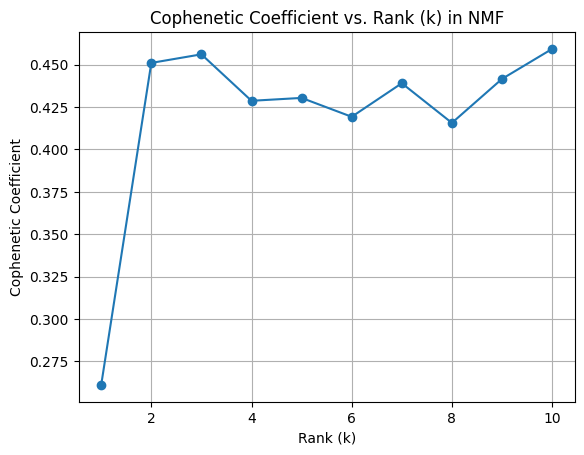

In [67]:
#define the data for nmf 
X = X_scaled_nmf
# Define the range of rank (k) values to test
rank_values = range(1, 11)
# Initialize a list to store cophenetic coefficients
cophenetic_coeffs = []

for k in rank_values:
    # Create an NMF model with the current rank (k)
    model = NMF(n_components=k, init='nndsvd', random_state=0) #because all data are positive so don't need to random
    
    # Fit the NMF model to your data
    W = model.fit_transform(X)
    H = model.components_
    
    # Get the linkage matrix for hierarchical clustering
    linkage_matrix = linkage(W, method='ward') 
    
    # Calculate cophenetic coefficient
    coph_coeff, coph_dists = cophenet(linkage_matrix, pdist(X))
    
    # Append the cophenetic coefficient to the list
    cophenetic_coeffs.append(coph_coeff)

# Plot the cophenetic coefficients against rank (k)
plt.plot(rank_values, cophenetic_coeffs, marker='o')
plt.title('Cophenetic Coefficient vs. Rank (k) in NMF')
plt.xlabel('Rank (k)')
plt.ylabel('Cophenetic Coefficient')
plt.grid(True)
plt.show()

shows rank = 3 and rank = 10 are good rank for NMF

In [68]:
n_components_1 = 3
n_components_2 = 10

In [69]:
#fit and transform the machine learning model by dataset with two values for parameter n_components
model = NMF(n_components_1, init='nndsvd', random_state=0)#5 is the best rank...
W = model.fit_transform(Dataset_nmf) #nmf features
H = model.components_

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [70]:
model2 = NMF(n_components_2, init='nndsvd', random_state=0)#5 is the best rank...
W2 = model2.fit_transform(Dataset_nmf) #nmf features
H2 = model2.components_

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Check reconstruction_err_ attribute, because it represents the fitted mass of the NMF model. The smaller the value, the better the model is fitted.

In [71]:
print('error_value for rank = 3: ', model.reconstruction_err_, ' vs ', 'error_value for rank = 10: ', model2.reconstruction_err_)

error_value for rank = 3:  63.920348014243686  vs  error_value for rank = 10:  51.31911989982033


In [72]:
H.shape

(3, 513)

In [73]:
compontents_df = pd.DataFrame(H, 
                              columns=Dataset_nmf.columns)
compontents_df_2 = compontents_df.T
compontents_df_2 = pd.concat([compontents_df.T,Dataset_sd[['Subgroup']]],axis=1)
compontents_df_2 = compontents_df_2.T
compontents_df

TCGA.HF.7136.STAD.C1_  TCGA.EW.A1OZ.BRCA.C1_  TCGA.EY.A1GL.UCEC.C1_   
0               0.670273               0.536199               0.738639  \
1               0.374405               0.436802               0.249843   
2               0.043526               0.130171               0.122499   

   TCGA.D1.A16D.UCEC.C1_  TCGA.R6.A8W8.ESCA.C1_  TCGA.CM.6676.COAD.C1_   
0               0.570018               0.773193               0.825512  \
1               0.415064               0.345064               0.205967   
2               0.136425               0.000000               0.101441   

   TCGA.L5.A43C.ESCA.C1_  TCGA.31.1944.OV.C1_  TCGA.D5.6920.COAD.C1_   
0               0.253430             0.655150               0.700875  \
1               0.707069             0.354750               0.392410   
2               0.074782             0.107439               0.005845   

   TCGA.K4.A3WS.BLCA.C1_  ...  TCGA.55.7281.LUAD.C6_  TCGA.85.8049.LUSC.C6_   
0               0.518160  ...               0.213521               0.267566  \
1               0.531307  ...               0.697346               0.739991   
2               0.000000  ...               0.160447               0.000583   

   TCGA.FX.A2QS.SARC.C6_  TCGA.CG.4462.STAD.C6_  TCGA.IB.7889.PAAD.C6_   
0               0.366987               0.079072               0.272852  \
1               0.457509               0.768106               0.660736   
2               0.285564               0.200387               0.123943   

   TCGA.43.2581.LUSC.C6_  TCGA.SH.A7BC.MESO.C6_  TCGA.EL.A3T9.THCA.C6_   
0               0.205031               0.140498               0.403977  \
1               0.700451               0.660060               0.513931   
2               0.160314               0.281538               0.172972   

   TCGA.A2.A4S1.BRCA.C6_  TCGA.AR.A2LJ.BRCA.C6_  
0               0.182884               0.314995  
1               0.615291               0.587001  
2               0.290966               0.187873  

[3 rows x 513 columns]

In [74]:
compontents_df_3 = pd.DataFrame(H2, 
                              columns=Dataset_nmf.columns)
compontents_df_4 = compontents_df_3.T
compontents_df_4 = pd.concat([compontents_df_3.T,Dataset_sd[['Subgroup']]],axis=1)
compontents_df_4 = compontents_df_4.T
compontents_df_3

TCGA.HF.7136.STAD.C1_  TCGA.EW.A1OZ.BRCA.C1_  TCGA.EY.A1GL.UCEC.C1_   
0               0.214136               0.422697               0.305488  \
1               0.140067               0.287877               0.016342   
2               0.024846               0.000000               0.043107   
3               0.000000               0.334069               0.406192   
4               0.514916               0.108418               0.190731   
5               0.378831               0.415083               0.213826   
6               0.015444               0.189833               0.000000   
7               0.326869               0.000000               0.410831   
8               0.089061               0.000000               0.200452   
9               0.293239               0.221573               0.334435   

   TCGA.D1.A16D.UCEC.C1_  TCGA.R6.A8W8.ESCA.C1_  TCGA.CM.6676.COAD.C1_   
0               0.277269               0.211139               0.209205  \
1               0.260257               0.159873               0.015294   
2               0.012522               0.000000               0.069041   
3               0.355979               0.000000               0.260131   
4               0.147809               0.692668               0.563621   
5               0.070757               0.071210               0.182870   
6               0.074263               0.183608               0.000000   
7               0.470911               0.329749               0.255936   
8               0.120332               0.141949               0.239100   
9               0.365959               0.356479               0.299661   

   TCGA.L5.A43C.ESCA.C1_  TCGA.31.1944.OV.C1_  TCGA.D5.6920.COAD.C1_   
0               0.000000             0.275706               0.110916  \
1               0.488001             0.196189               0.213669   
2               0.000000             0.000000               0.000000   
3               0.050107             0.530276               0.104389   
4               0.266254             0.186807               0.654390   
5               0.366757             0.213738               0.089264   
6               0.026205             0.090180               0.042874   
7               0.222796             0.270383               0.292043   
8               0.156547             0.055248               0.107852   
9               0.465909             0.239568               0.488739   

   TCGA.K4.A3WS.BLCA.C1_  ...  TCGA.55.7281.LUAD.C6_  TCGA.85.8049.LUSC.C6_   
0               0.081141  ...               0.009077               0.000000  \
1               0.194430  ...               0.546109               0.481025   
2               0.000000  ...               0.013214               0.000000   
3               0.354174  ...               0.347402               0.065720   
4               0.175588  ...               0.038262               0.218572   
5               0.314985  ...               0.164927               0.302884   
6               0.178225  ...               0.107719               0.099827   
7               0.137576  ...               0.430531               0.272135   
8               0.065014  ...               0.008742               0.000000   
9               0.601135  ...               0.388456               0.561803   

   TCGA.FX.A2QS.SARC.C6_  TCGA.CG.4462.STAD.C6_  TCGA.IB.7889.PAAD.C6_   
0               0.082434               0.000000               0.044881  \
1               0.241396               0.584710               0.472232   
2               0.183095               0.029964               0.000000   
3               0.076648               0.000000               0.281784   
4               0.289766               0.099579               0.072575   
5               0.609481               0.413940               0.073662   
6               0.200752               0.019641               0.099120   
7               0.000000               0.271405               0.320940   
8               0.227771               0.301

I shows appear some 0.000 data 

In [75]:
W.shape

(440, 3)

In [76]:
compontents_df_W = pd.DataFrame(W,
                                index=Dataset_nmf.index)
compontents_df_W = compontents_df_W.T
compontents_df_W


ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5  ALKBH7_S5  ALOX5AP_S3   
0   0.523795  0.386598    0.413939  0.179554  0.683130   0.656076    0.123648  \
1   0.118208  0.598067    0.594447  0.465999  0.077371   0.191279    0.856451   
2   0.163163  0.392037    0.269655  0.451391  0.554604   0.525198    0.489633   

   AMPD3_S3  APITD1_S5  APOC1_S3  ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   
0  0.318118   0.748332  0.260790  ...  0.687595  0.160825  0.361301  0.537607  \
1  0.351218   0.380590  0.506687  ...  0.062096  0.870081  0.341793  0.032127   
2  0.400525   0.512428  0.466239  ...  0.384655  0.628547  0.392321  0.424888   

    WSB2_S5  ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  
0  0.533319   0.680243  0.340690  0.430017  0.331779  0.321591  
1  0.252569   0.221784  0.447574  0.394233  0.074312  0.000000  
2  0.665708   0.229681  0.207330  0.089724  0.194502  0.464619  

[3 rows x 440 columns]

In [77]:
compontents_df_W2 = pd.DataFrame(W2,
                                index=Dataset_nmf.index)
compontents_df_W2 = compontents_df_W2.T
compontents_df_W2

ACTL6A_S5  ADAM9_S2  ADAMTS1_S5  ADCY7_S3  AIMP2_S5  ALKBH7_S5  ALOX5AP_S3   
0   0.430239  0.379590    0.146470  0.000000  0.529449   0.431899    0.101489  \
1   0.038995  0.337747    0.000000  0.291349  0.071195   0.037884    0.840680   
2   0.132580  0.401605    0.291162  0.544452  0.532018   0.490208    0.462853   
3   0.148231  0.000000    0.201518  0.000000  0.397999   0.620760    0.214920   
4   0.523253  0.252605    0.000000  0.286569  0.514471   0.175233    0.007627   
5   0.163038  0.373766    0.575184  0.335221  0.061498   0.000000    0.287167   
6   0.132902  0.000000    0.074577  0.199110  0.000000   0.000000    0.079860   
7   0.132385  0.654977    0.415638  0.382127  0.159397   0.131819    0.480442   
8   0.000000  0.000000    0.298541  0.000000  0.220628   0.306916    0.000000   
9   0.000000  0.183018    0.403738  0.077339  0.000000   0.258730    0.041755   

   AMPD3_S3  APITD1_S5  APOC1_S3  ...  WDR77_S5  WIPF1_S3  WNT2B_S2  WNT8B_S2   
0  0.326058   0.577687  0.252097  ...  0.471757  0.045296  0.028522  0.516410  \
1  0.201924   0.145153  0.647377  ...  0.028383  0.598717  0.000000  0.000000   
2  0.422952   0.462383  0.380538  ...  0.359222  0.693346  0.483211  0.416484   
3  0.081995   0.480424  0.311009  ...  0.456640  0.037858  0.214072  0.221557   
4  0.042139   0.267296  0.113498  ...  0.549039  0.080647  0.285511  0.273995   
5  0.031794   0.121129  0.000000  ...  0.000000  0.544400  0.439029  0.087329   
6  0.097504   0.193008  0.114607  ...  0.000000  0.161817  0.015076  0.000000   
7  0.551267   0.459787  0.000000  ...  0.224082  0.144927  0.263215  0.096001   
8  0.009732   0.251184  0.268957  ...  0.051885  0.210917  0.076694  0.139759   
9  0.188054   0.136978  0.000000  ...  0.056312  0.391260  0.290523  0.118597   

    WSB2_S5  ZWILCH_S5    ZYX_S2   MMP3_S2    PLG_S5   RGS8_S5  
0  0.540310   0.490225  0.000000  0.116208  0.186179  0.317912  
1  0.156235   0.054440  0.077668  0.000000  0.000000  0.000000  
2  0.695047   0.192911  0.217656  0.134679  0.151318  0.498077  
3  0.169033   0.258734  0.441062  0.078630  0.099786  0.121079  
4  0.263097   0.706149  0.153551  0.467293  0.144149  0.100824  
5  0.105917   0.424607  0.412070  0.587580  0.000000  0.105456  
6  0.101570   0.150573  0.000000  0.124582  0.197832  0.000000  
7  0.328916   0.056305  0.227068  0.179336  0.000000  0.154254  
8  0.163678   0.019450  0.128711  0.000000  0.435797  0.152734  
9  0.151052   0.007205  0.205977  0.253172  0.000000  0.000000  

[10 rows x 440 columns]

I shows appear some 0.000 data 

A large number of occurrences of 0 means that the proportion of weight is 0, which means that the meaning of the presence of this component is not significant because a lot of features contribute to 0 on this. In this case, those component is redundant.

#### b. Visualising

Clustermap : help to understand the results of decomposition and patterns between data points. Helps provide insight into the structure of complex datasets

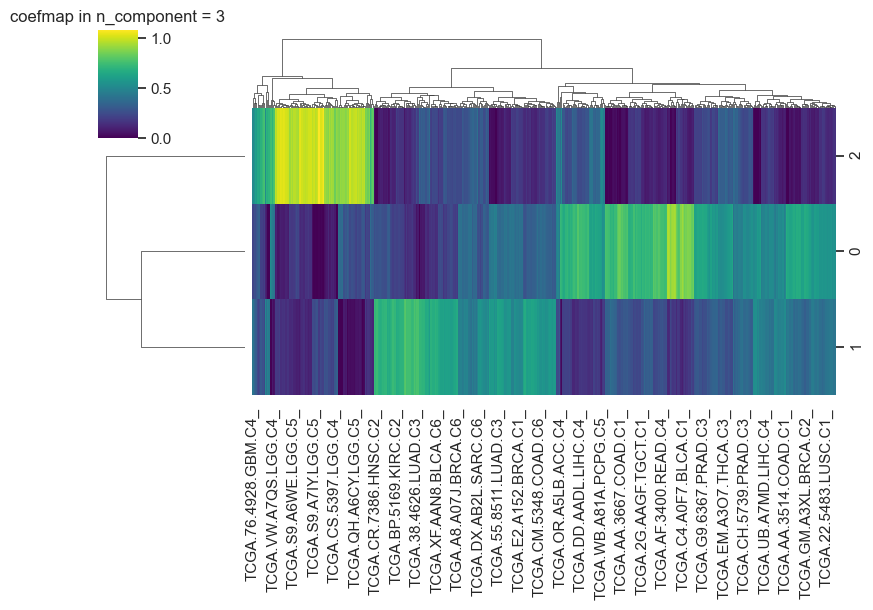

In [78]:
sns.set(font_scale=1)  # Adjust the font size if needed
sns.clustermap(compontents_df, cmap='viridis', method='average', metric='euclidean', figsize=(8, 6))
plt.title('coefmap in n_component = 3')
# Show the plot
plt.show()

The light squares shows high relatship between horizontal coordinate and Vertical Coordinates. For example, the yellow square in the upper left corner shows high relationship between component 2 and the sample it Corresponding. And those sample have low relationship in component 0 and 1. For component 1 has a square which colour is lighter than others. Moreover, components 1 can find one square too. And looking at the top, shows some clusters and can see when sample in same cluster they have sample high relationship in same component.

Matrix W is represent the relationship bewteen the features and components. Because plot shows by clustermap

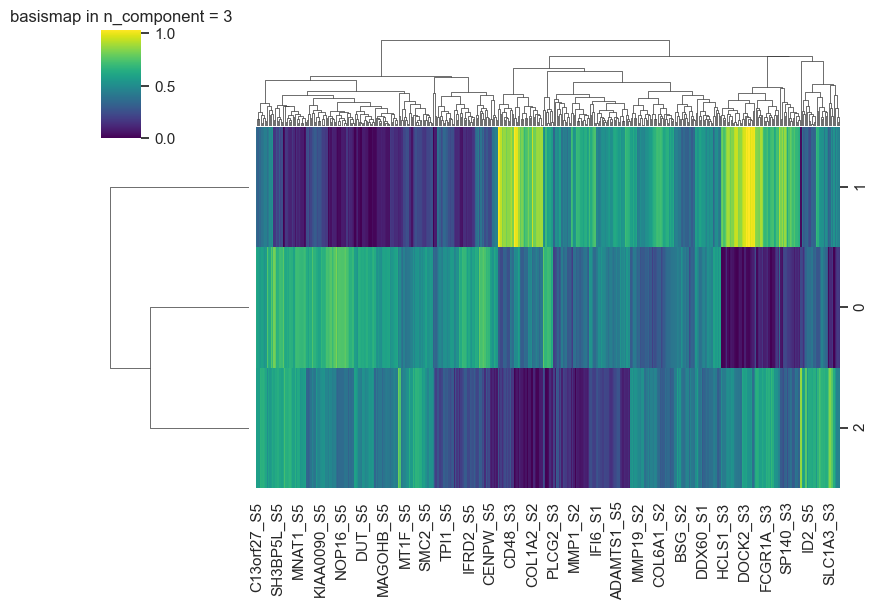

In [79]:
sns.set(font_scale=1)  # Adjust the font size if needed
sns.clustermap(compontents_df_W, cmap='viridis', method='average', metric='euclidean', figsize=(8, 6))
plt.title('basismap in n_component = 3')
# Show the plot
plt.show()

Martix W shows the relationship features and components. Same as before, light squares shows high relatship between horizontal coordinate and Vertical Coordinates.

When rank = 3, the plot shows correlation and irrelevance very well, It is easy to observe the difference.

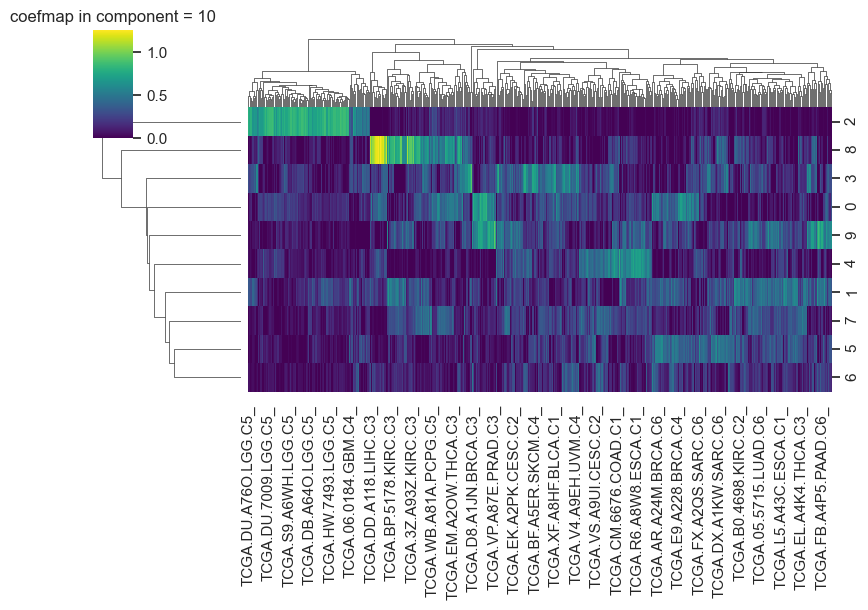

In [80]:
sns.set(font_scale=1)  # Adjust the font size if needed
sns.clustermap(compontents_df_3, cmap='viridis', method='average', metric='euclidean', figsize=(8, 6))
plt.title('coefmap in component = 10')
# Show the plot
plt.show()

The bottom 4 lines don't make much sense or clearly distinguish the relevancy.

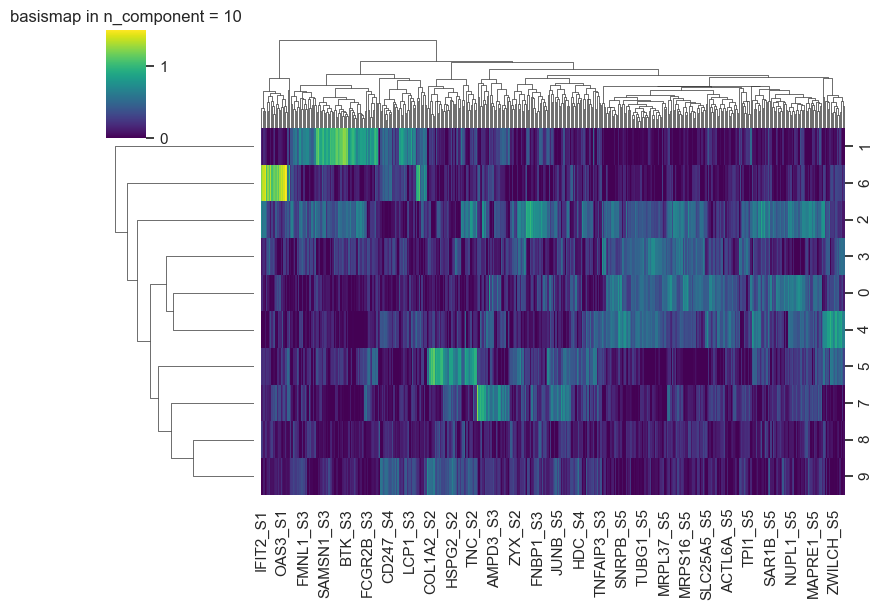

In [81]:
sns.set(font_scale=1)  # Adjust the font size if needed
sns.clustermap(compontents_df_W2, cmap='viridis', method='average', metric='euclidean', figsize=(8, 6))
plt.title('basismap in n_component = 10')
# Show the plot
plt.show()

The bottom 2 lines don't make much sense or clearly distinguish the relevancy.

It seems rank = 3 is better than rank = 10 when doing the NMF. It is more obvious and effective. Because when rank = 10, some rows and columns seem don't need, and never display some useful information.

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


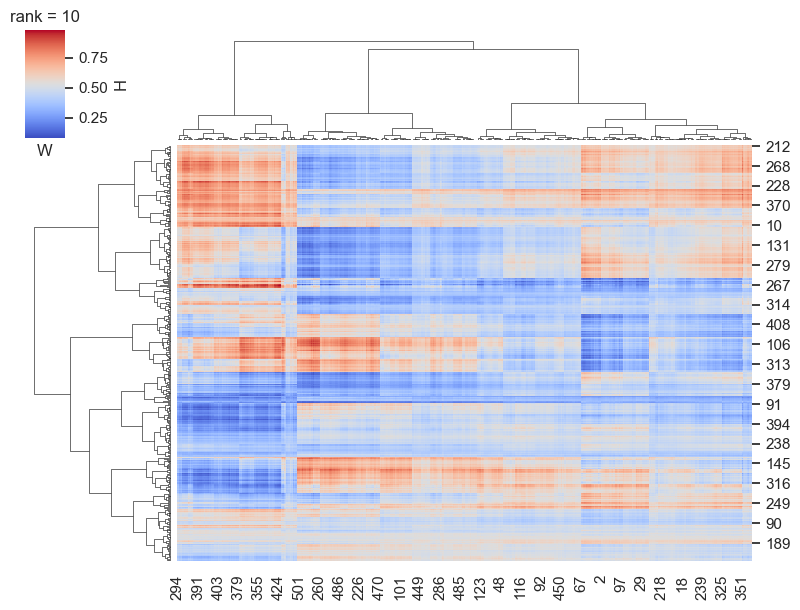

In [111]:
# Create a sample dataset (replace this with your own data)
data = np.dot(W, H)

# Create a DataFrame for your NMF data
df = pd.DataFrame(data, columns=range(data.shape[1]))

# Create a clustermap
sns.clustermap(df, cmap='coolwarm', method='ward', figsize=(8, 6))
plt.title('rank = 10')
plt.xlabel("W")
plt.ylabel("H")
# Display the plot
plt.show()

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


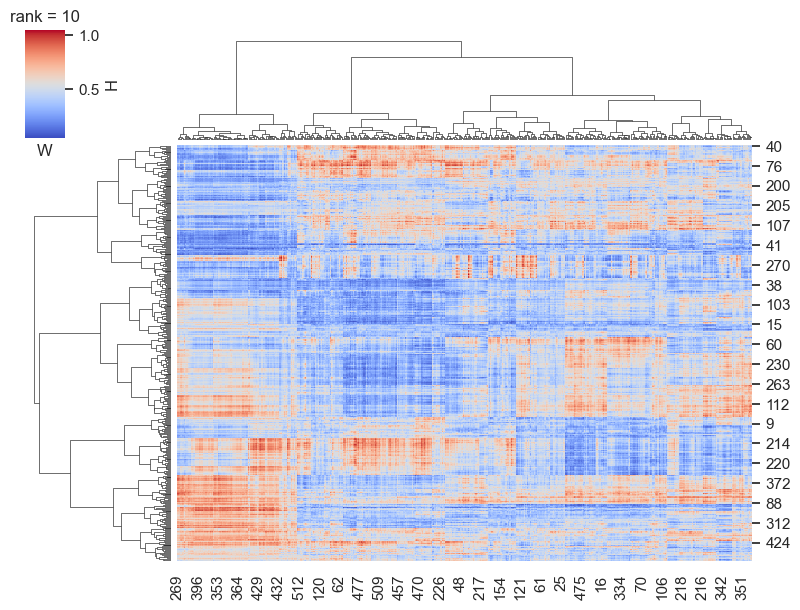

In [109]:
# Create a sample dataset (replace this with your own data)
data = np.dot(W2, H2)

# Create a DataFrame for your NMF data
df = pd.DataFrame(data, columns=range(data.shape[1]))

# Create a clustermap
sns.clustermap(df, cmap='coolwarm', method='ward', figsize=(8, 6))
plt.title('rank = 10')
plt.xlabel("W")
plt.ylabel("H")
# Display the plot
plt.show()

It can be seen that when they are reconstructed into a data set, the results obtained by the two ranks are almost the same, then the results are almost the same, I think it is more efficient and meaningful to choose the smaller rank value.

Feature Weight Heatmap: create a heatmap to visualize the feature weights in the factor matrix W. Each row in the heatmap represents a component, and each column represents a feature. The color intensity at the intersection of a component and feature shows the weight of that feature in the component.

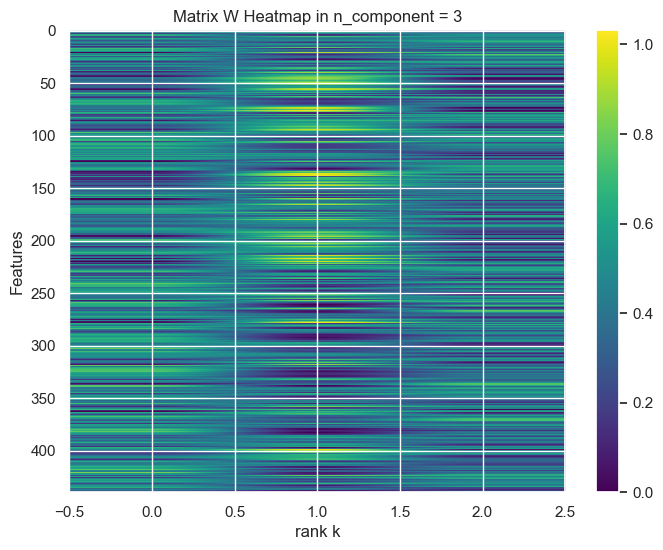

In [84]:
#for feature analysis
plt.figure(figsize=(8, 6))
plt.imshow(W, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Matrix W Heatmap in n_component = 3")
plt.xlabel("rank k")
plt.ylabel("Features")
plt.show()

Matrix W is represent the how features are combined to reconstruct the original data.

Cluster Visualization: Trying to find the cluster for subgroup 

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


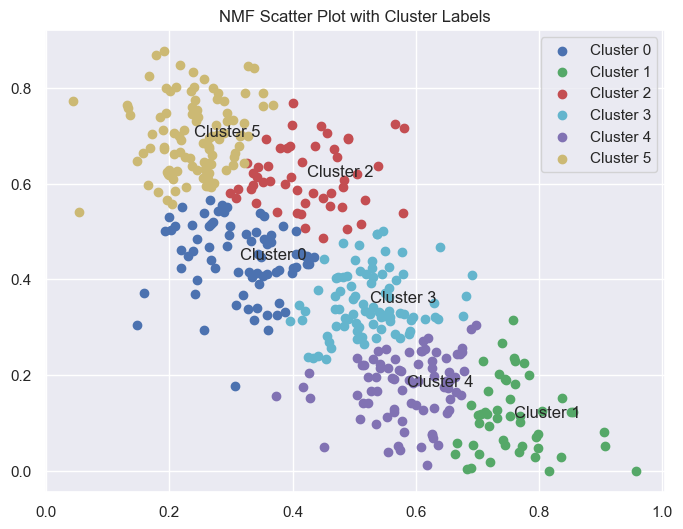

In [85]:
X = X_scaled_nmf
# Apply NMF for dimensionality reduction
nmf = NMF(n_components=2)
X_nmf = nmf.fit_transform(X)

# Perform K-Means clustering into 6 clusters -> subgroup are 6
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(X_nmf)

# Create a list of colors for plotting
colors = cycle(['b', 'g', 'r', 'c', 'm', 'y'])  # You can extend this list for more colors

# Visualize the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster_num, color in zip(range(6), colors):
    cluster_points = X_nmf[labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1,], c=color, label=f'Cluster {cluster_num}')

# Label clusters
for cluster in range(6):
    cluster_center = X_nmf[labels == cluster].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], f'Cluster {cluster}', fontsize=12)

plt.title("NMF Scatter Plot with Cluster Labels")
plt.legend()
plt.show()


It can see that there is a linear relationship in the overall trend. But Cluster 1 is very recognisable.

C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\murui\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


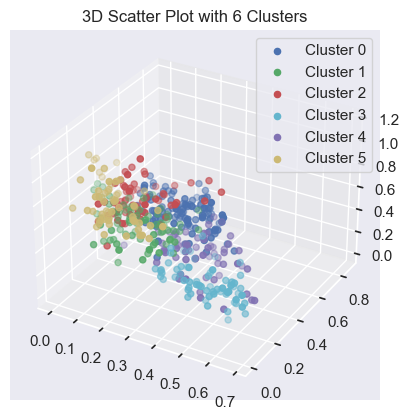

In [86]:
# Generate some example data
X= X_scaled_nmf

# Apply NMF for dimensionality reduction
nmf = NMF(n_components=3)  # Use 3 components for 3D
X_nmf = nmf.fit_transform(X)

# Perform K-Means clustering into 6 clusters
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(X_nmf)

# Create a list of colors for plotting
colors = cycle('bgrcmy')  # You can extend this for more colors

# Visualize the 3D scatter plot with different colors for each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num, color in zip(range(6), colors):
    cluster_points = X_nmf[labels == cluster_num]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {cluster_num}')

ax.set_title("3D Scatter Plot with 6 Clusters")
ax.legend(loc='best')
plt.show()


It looks two of the groups are very well separated, but the remaining four groups are together.

Conclusion:  In terms of error, the error in reconstructing the data is a bit large. The success rate is only 50%, and it would be perfect if the error could be more minor. However, the generated W and H have interpretable components, and the differences between the parts and the production clusters are also seen through visualisation.NMF for dataset targeting should be carried out for feature extraction and data dimensionality reduction. However, I think data degradation is to realise the extracted features. The aim is to efficiently analyse the main influencing components of the data set.

Visualisation provides a better view of clusters and their distribution, as well as trends in the data.

### Principal Component Analysis(PCA)

#### a. Application of PCA

In [87]:
#format dataset
features = Dataset_1.columns[0:-1]
x_pca = Dataset_sd.loc[:,features].values
y_pca = Dataset_sd.loc[:,['Subgroup']].values

In [88]:
pca = PCA(n_components=0.9) # set pca function for 90% data
Dataset_pca = pca.fit_transform(x_pca)
Dataset_pca


array([[-0.22086956, -1.57353236,  1.62778104, ...,  0.18280888,
        -0.03627199,  0.06702992],
       [-0.65072698, -0.77176889,  0.46795313, ...,  0.18633462,
         0.02753773,  0.15819418],
       [ 0.82876425, -1.7883118 , -0.24780858, ..., -0.35957439,
         0.04768204, -0.36755787],
       ...,
       [-1.30179571, -0.07552246, -0.13932056, ...,  0.07359615,
         0.14471046, -0.03762028],
       [-2.10909455,  1.16512941, -0.79659035, ...,  0.00502626,
        -0.27785708,  0.15322508],
       [-1.86684625,  0.39593328, -1.37928861, ..., -0.06436798,
         0.06116171,  0.04452186]])

In [89]:
print(pca.explained_variance_ratio_.cumsum())

[0.23706203 0.40262552 0.45346892 0.49663741 0.5327645  0.56335521
 0.5873575  0.60933684 0.62712978 0.6432445  0.65793841 0.67151867
 0.68296563 0.69411493 0.70398508 0.71266598 0.72048057 0.72786919
 0.73464777 0.74094081 0.74713051 0.75312785 0.75881736 0.76415767
 0.76932186 0.77424919 0.77886561 0.78339976 0.78756513 0.79163156
 0.79563607 0.79937535 0.80293863 0.80638147 0.80973273 0.81303144
 0.81622553 0.81928301 0.82220704 0.82493434 0.82765238 0.83032314
 0.83289089 0.83536028 0.8378268  0.84023843 0.84264276 0.84497953
 0.8472294  0.84941442 0.85156252 0.8536918  0.85574011 0.85777526
 0.85975976 0.86171791 0.86358299 0.86543353 0.86725918 0.86904035
 0.87081097 0.87257487 0.87427877 0.87591737 0.8775382  0.87913788
 0.88073018 0.88229619 0.88383964 0.88537677 0.88684614 0.88830666
 0.88975582 0.89118181 0.89257139 0.89394927 0.89531181 0.89663958
 0.89795251 0.89925148 0.90052438]


The motivation for performing PCA is to eliminate multicollinearity and perform feature selection to help build high-performance predictions while improving computational efficiency because the dimensionality of the

#### b. Plot and determining the number of retained components

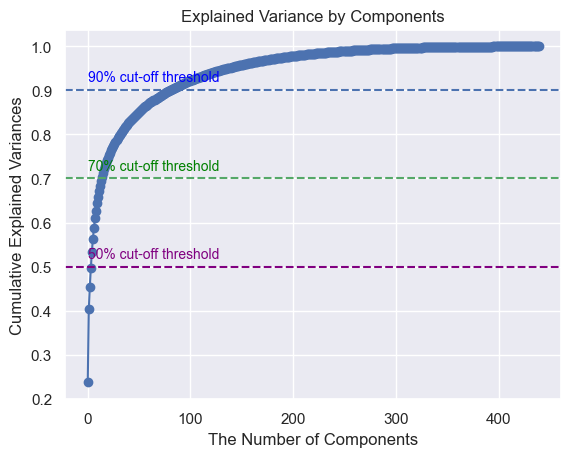

In [90]:
pca1 = PCA()
pca1.fit_transform(x_pca)
plt.plot(pca1.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')#plot variance_sum follow the principal
plt.axhline(y=0.9, color='b', linestyle='--') # plot a line when y=1 cause this is when principal include 90% data
plt.text(0.5, 0.92, '90% cut-off threshold', color = 'blue', fontsize=10)
plt.axhline(y=0.7, color='g', linestyle='--') # plot a line when y=1 cause this is when principal include 70% data
plt.text(0.5, 0.72, '70% cut-off threshold', color = 'green', fontsize=10)
plt.axhline(y=0.5, color='purple', linestyle='--') # plot a line when y=1 cause this is when principal include 50% data
plt.text(0.5, 0.52, '50% cut-off threshold', color = 'purple', fontsize=10)
plt.title('Explained Variance by Components')
plt.xlabel("The Number of Components")
plt.ylabel("Cumulative Explained Variances" )
plt.show()

plot the relationship between explain variancess and components beacuase PCA is finding the biggest variance to build new coordinate system then can loss least data. So this is related to how many data will lose. Using explained_variance_ratio_ attribute from machine learning to check the precentage of the data hold by principal components. Can choose how many principal it need when I want 90% data or other precentage.

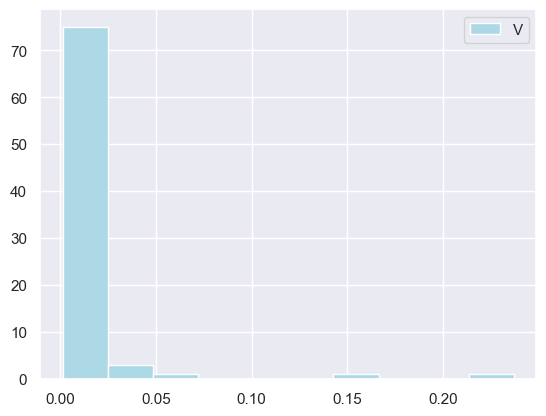

In [91]:
plt.hist([round(a, 4) for a in pca.explained_variance_ratio_], density=False, color = 'lightblue', cumulative = False, label = "V")
plt.legend()
plt.show()

In [92]:
df_pca_components = pca1.explained_variance_ratio_.cumsum() > 0.90
Number_of_components_percentage =  440 - df_pca_components.sum()
Number_of_components_percentage

80

It can be concluded that if we want to reduce Dimension that the downscaled data contains 90% of the original data, then 99 features are needed to do so. Bust first 4 feature can contains 50% data

#### 3D PCA Visualisation

Due to 3D only need 3 feature, choose first 3 features to plot.

In [93]:
Dataset_pca = pd.DataFrame(data=Dataset_pca.T[0:3].T,
                            columns=['PC1','PC2','PC3'],
                            index=Dataset_sd.index)
Dataset_pca                       

PC1       PC2       PC3
TCGA.HF.7136.STAD.C1_ -0.220870 -1.573532  1.627781
TCGA.EW.A1OZ.BRCA.C1_ -0.650727 -0.771769  0.467953
TCGA.EY.A1GL.UCEC.C1_  0.828764 -1.788312 -0.247809
TCGA.D1.A16D.UCEC.C1_ -0.403537 -0.892226 -0.592516
TCGA.R6.A8W8.ESCA.C1_  0.086907 -2.157220  1.319764
...                         ...       ...       ...
TCGA.43.2581.LUSC.C6_ -2.844417  0.868858  0.636143
TCGA.SH.A7BC.MESO.C6_ -2.477495  1.364205  0.053401
TCGA.EL.A3T9.THCA.C6_ -1.301796 -0.075522 -0.139321
TCGA.A2.A4S1.BRCA.C6_ -2.109095  1.165129 -0.796590
TCGA.AR.A2LJ.BRCA.C6_ -1.866846  0.395933 -1.379289

[513 rows x 3 columns]

In [94]:
Dataset_pca = pd.concat([Dataset_pca,Dataset_sd[['Subgroup']]], axis=1)
Dataset_pca

PC1       PC2       PC3 Subgroup
TCGA.HF.7136.STAD.C1_ -0.220870 -1.573532  1.627781       C1
TCGA.EW.A1OZ.BRCA.C1_ -0.650727 -0.771769  0.467953       C1
TCGA.EY.A1GL.UCEC.C1_  0.828764 -1.788312 -0.247809       C1
TCGA.D1.A16D.UCEC.C1_ -0.403537 -0.892226 -0.592516       C1
TCGA.R6.A8W8.ESCA.C1_  0.086907 -2.157220  1.319764       C1
...                         ...       ...       ...      ...
TCGA.43.2581.LUSC.C6_ -2.844417  0.868858  0.636143       C6
TCGA.SH.A7BC.MESO.C6_ -2.477495  1.364205  0.053401       C6
TCGA.EL.A3T9.THCA.C6_ -1.301796 -0.075522 -0.139321       C6
TCGA.A2.A4S1.BRCA.C6_ -2.109095  1.165129 -0.796590       C6
TCGA.AR.A2LJ.BRCA.C6_ -1.866846  0.395933 -1.379289       C6

[513 rows x 4 columns]

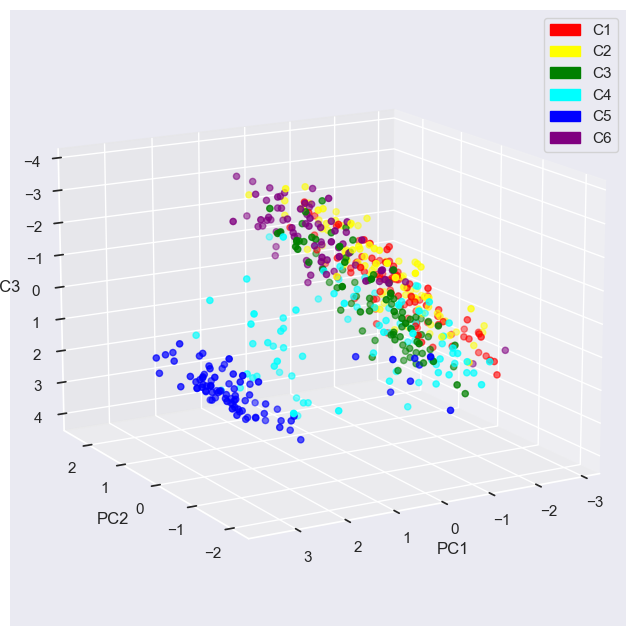

In [95]:
# plot 3D:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Define colours
color_map = {'C1': 'red', 'C2': 'yellow', 'C3':'green', 'C4':'cyan', 'C5': 'blue', 'C6': 'purple'}

# Data for three-dimensional scattered points
zdata = Dataset_pca['PC1']
xdata = Dataset_pca['PC2']
ydata = Dataset_pca['PC3']

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(-165, 120)

ax.scatter3D(xdata, ydata, zdata, c=Dataset_pca['Subgroup'].map(color_map))

c1 = mpatches.Patch(color='red', label='C1')
c2 = mpatches.Patch(color='yellow', label='C2')
c3 = mpatches.Patch(color='green', label='C3')
c4 = mpatches.Patch(color='cyan', label='C4')
c5 = mpatches.Patch(color='blue', label='C5')
c6 = mpatches.Patch(color='purple', label='C6')

plt.legend(handles=[c1, c2, c3, c4, c5, c6])

It can be seen that the results are very similar to those of the previous NMF visualisation, in that two of the groups are very clearly distinguishable, but the other four groups show a regular pattern of moving together in the same way from the top left corner to the bottom right corner. And in terms of general data trends, they are the same.

Closer points have higher similarity in structure and relationship and similar principal components.

Rotate the picture to observe：

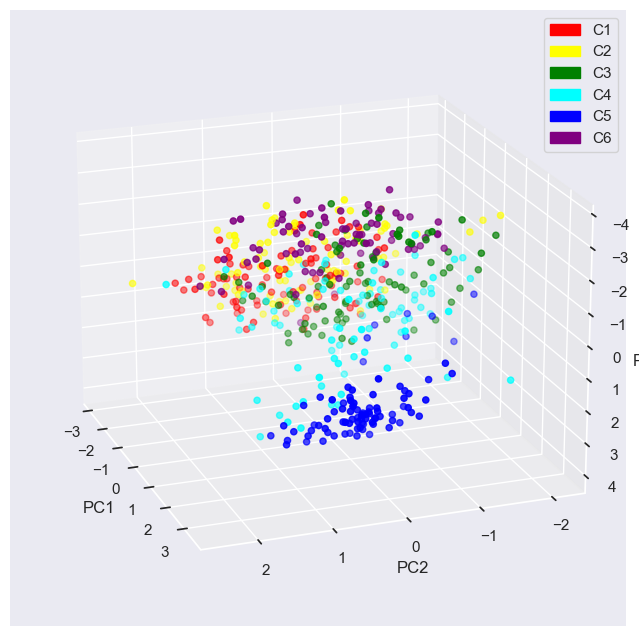

In [96]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Define colours
color_map = {'C1': 'red', 'C2': 'yellow', 'C3':'green', 'C4':'cyan', 'C5': 'blue', 'C6': 'purple'}

# Data for three-dimensional scattered points
zdata = Dataset_pca['PC1']
xdata = Dataset_pca['PC2']
ydata = Dataset_pca['PC3']

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(-160, 200)

ax.scatter3D(xdata, ydata, zdata, c=Dataset_pca['Subgroup'].map(color_map))

c1 = mpatches.Patch(color='red', label='C1')
c2 = mpatches.Patch(color='yellow', label='C2')
c3 = mpatches.Patch(color='green', label='C3')
c4 = mpatches.Patch(color='cyan', label='C4')
c5 = mpatches.Patch(color='blue', label='C5')
c6 = mpatches.Patch(color='purple', label='C6')

plt.legend(handles=[c1, c2, c3, c4, c5, c6])

The four subgroups that look like they're together have the feeling of being one layer on top of another.And they all maintain a linear

### t-SNE Dimensionality Reduction

Prepare Data

In [97]:
features = Dataset_1.columns[0:-1]
x_tsne = Dataset_sd.loc[:,features].values
y_tsne = Dataset_sd.loc[:,['Subgroup']].values

#### a. Application of t-SNE

Not sure if should draw 2D or 3D will better, check n_componments to see which is more appropriate in different situations.

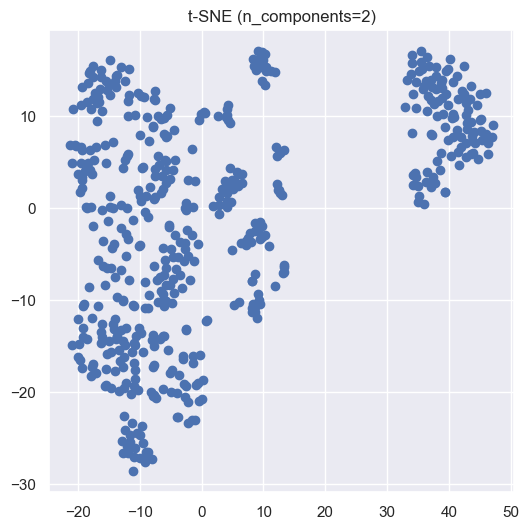

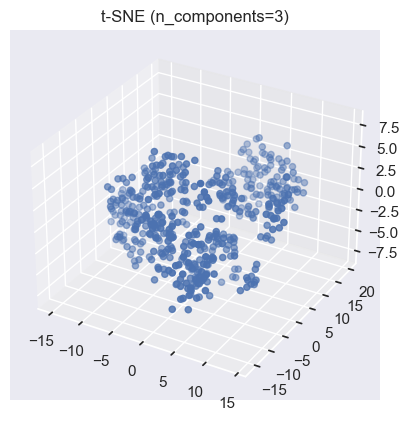

In [98]:

X = x_tsne 


# Initialise t-SNE model, set different n_components values and visualise
n_components_list = [2, 3]  # 
perplexity = 30 

for n_components in n_components_list:
    tsne = TSNE(n_components=n_components, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)

    # 可视化降维后的数据
    if n_components == 2:
        plt.figure(figsize=(6, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
        plt.title(f't-SNE (n_components={n_components})')
        plt.show()
    elif n_components == 3:
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2])
        ax.set_title(f't-SNE (n_components={n_components})')
        plt.show()

The 2D image looks similar to the results obtained by the previous two downscaling methods.

I decided to draw two pictures together

In [99]:
tsne = TSNE(n_components=3, random_state=0)
X_3d = tsne.fit_transform(x_tsne)

In [100]:
tsne_1 = TSNE(n_components=2, random_state=0)
X_2d = tsne_1.fit_transform(x_tsne)

In [101]:
X_3d

array([[ -1.6142616, -11.426699 ,  -5.145396 ],
       [ -1.0413069,  -1.5464859,  -3.6518073],
       [  4.791106 ,  -4.6398287,  -1.5009079],
       ...,
       [ -5.3804784,   0.6474102,   3.2778208],
       [ -8.747445 ,   2.0955217,  -5.7901073],
       [ -4.704082 ,  -1.6342709,  -2.8095233]], dtype=float32)

In [102]:
Dataset_tsne = pd.DataFrame(data = X_3d,
                            columns=['feature1','feature2','feature3'],
                            index=Dataset_sd.index)
Dataset_tsne

feature1   feature2  feature3
TCGA.HF.7136.STAD.C1_  -1.614262 -11.426699 -5.145396
TCGA.EW.A1OZ.BRCA.C1_  -1.041307  -1.546486 -3.651807
TCGA.EY.A1GL.UCEC.C1_   4.791106  -4.639829 -1.500908
TCGA.D1.A16D.UCEC.C1_   0.634710  -5.939110 -0.696586
TCGA.R6.A8W8.ESCA.C1_   0.456902 -12.938315 -6.142682
...                          ...        ...       ...
TCGA.43.2581.LUSC.C6_ -13.882877  -0.772022  3.460467
TCGA.SH.A7BC.MESO.C6_  -9.458762  -0.729669 -4.345543
TCGA.EL.A3T9.THCA.C6_  -5.380478   0.647410  3.277821
TCGA.A2.A4S1.BRCA.C6_  -8.747445   2.095522 -5.790107
TCGA.AR.A2LJ.BRCA.C6_  -4.704082  -1.634271 -2.809523

[513 rows x 3 columns]

In [103]:
Dataset_tsne1 = pd.DataFrame(data = X_2d,
                            columns=['feature1','feature2'],
                            index=Dataset_sd.index)
Dataset_tsne1

feature1   feature2
TCGA.HF.7136.STAD.C1_   9.009348 -15.098787
TCGA.EW.A1OZ.BRCA.C1_  -7.607230 -14.919571
TCGA.EY.A1GL.UCEC.C1_   9.072879  -2.854402
TCGA.D1.A16D.UCEC.C1_  -4.740012  -4.195903
TCGA.R6.A8W8.ESCA.C1_   9.611462 -13.326759
...                          ...        ...
TCGA.43.2581.LUSC.C6_ -18.469227 -14.071336
TCGA.SH.A7BC.MESO.C6_ -22.456432  -6.157858
TCGA.EL.A3T9.THCA.C6_ -15.806913  -4.879653
TCGA.A2.A4S1.BRCA.C6_ -21.192274  -1.086885
TCGA.AR.A2LJ.BRCA.C6_ -19.546152  -6.487153

[513 rows x 2 columns]

In [104]:
Dataset_tsne = pd.concat([Dataset_tsne,Dataset_sd[['Subgroup']]], axis=1)
Dataset_tsne

feature1   feature2  feature3 Subgroup
TCGA.HF.7136.STAD.C1_  -1.614262 -11.426699 -5.145396       C1
TCGA.EW.A1OZ.BRCA.C1_  -1.041307  -1.546486 -3.651807       C1
TCGA.EY.A1GL.UCEC.C1_   4.791106  -4.639829 -1.500908       C1
TCGA.D1.A16D.UCEC.C1_   0.634710  -5.939110 -0.696586       C1
TCGA.R6.A8W8.ESCA.C1_   0.456902 -12.938315 -6.142682       C1
...                          ...        ...       ...      ...
TCGA.43.2581.LUSC.C6_ -13.882877  -0.772022  3.460467       C6
TCGA.SH.A7BC.MESO.C6_  -9.458762  -0.729669 -4.345543       C6
TCGA.EL.A3T9.THCA.C6_  -5.380478   0.647410  3.277821       C6
TCGA.A2.A4S1.BRCA.C6_  -8.747445   2.095522 -5.790107       C6
TCGA.AR.A2LJ.BRCA.C6_  -4.704082  -1.634271 -2.809523       C6

[513 rows x 4 columns]

In [105]:
Dataset_tsne1 = pd.concat([Dataset_tsne1,Dataset_sd[['Subgroup']]], axis=1)
Dataset_tsne1

feature1   feature2 Subgroup
TCGA.HF.7136.STAD.C1_   9.009348 -15.098787       C1
TCGA.EW.A1OZ.BRCA.C1_  -7.607230 -14.919571       C1
TCGA.EY.A1GL.UCEC.C1_   9.072879  -2.854402       C1
TCGA.D1.A16D.UCEC.C1_  -4.740012  -4.195903       C1
TCGA.R6.A8W8.ESCA.C1_   9.611462 -13.326759       C1
...                          ...        ...      ...
TCGA.43.2581.LUSC.C6_ -18.469227 -14.071336       C6
TCGA.SH.A7BC.MESO.C6_ -22.456432  -6.157858       C6
TCGA.EL.A3T9.THCA.C6_ -15.806913  -4.879653       C6
TCGA.A2.A4S1.BRCA.C6_ -21.192274  -1.086885       C6
TCGA.AR.A2LJ.BRCA.C6_ -19.546152  -6.487153       C6

[513 rows x 3 columns]

#### b. Visualising t-SNE Results

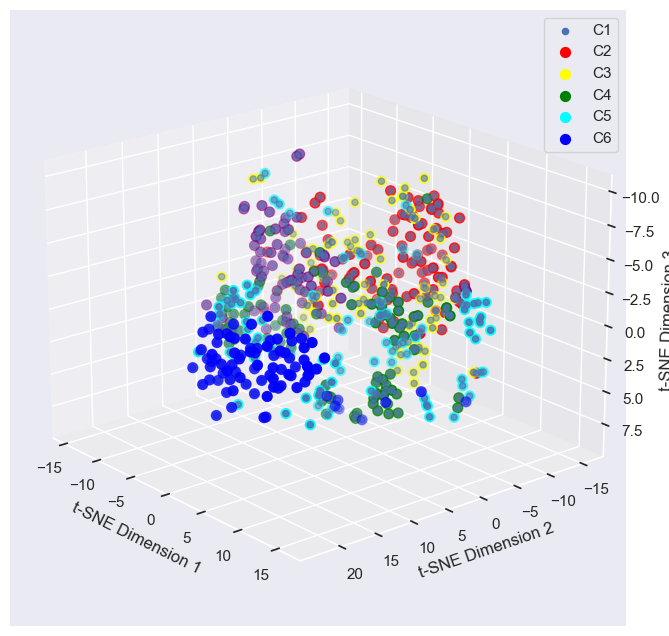

In [106]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c='b', marker='o')

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.view_init(-160, 220)
targets = ['C1', 'C2', 'C3','C4','C5','C6']
colors = ['red', 'yellow', 'green','cyan','blue','purple']
for target, color in zip(targets,colors):
    indicesToKeep = Dataset_tsne['Subgroup'] == target
    ax.scatter(Dataset_tsne.loc[indicesToKeep, 'feature1']
               , Dataset_tsne.loc[indicesToKeep, 'feature2']
               , Dataset_tsne.loc[indicesToKeep, 'feature3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

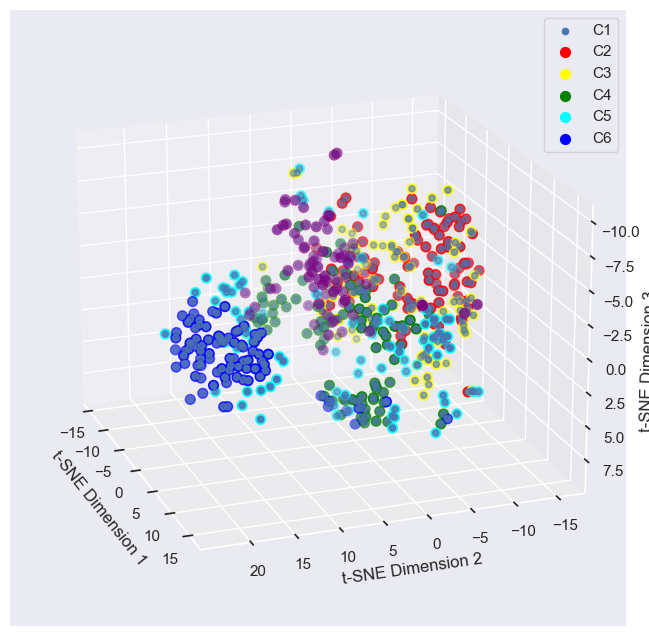

In [107]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c='b', marker='o')

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.view_init(-160, 200)
targets = ['C1', 'C2', 'C3','C4','C5','C6']
colors = ['red', 'yellow', 'green','cyan','blue','purple']
for target, color in zip(targets,colors):
    indicesToKeep = Dataset_tsne['Subgroup'] == target
    ax.scatter(Dataset_tsne.loc[indicesToKeep, 'feature1']
               , Dataset_tsne.loc[indicesToKeep, 'feature2']
               , Dataset_tsne.loc[indicesToKeep, 'feature3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

t-SNE visualization results look similar to PCA dimensionality reduction, but not as crisp and clear as PCA. I thinks is beacuase t-SNE focuses on preserving local structures and capturing non-linear relationships in data. It is more care about interpreting patterns and clusters not the linear combinations.

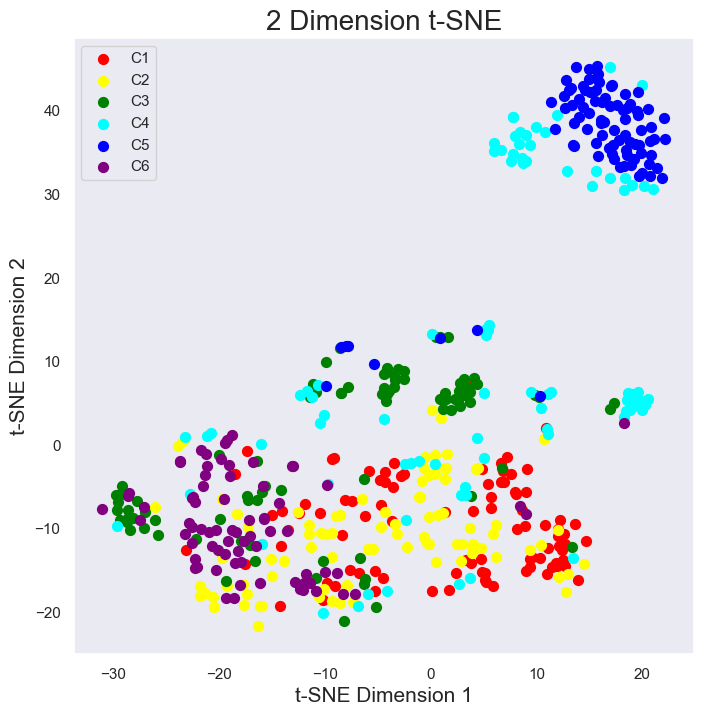

In [108]:
fig = plt.figure(figsize = (8,8)) #size of the plot
ax = fig.add_subplot(1,1,1) #Add an Axes to the current figure or retrieve an existing Axes.
ax.set_xlabel('t-SNE Dimension 1', fontsize = 15)
ax.set_ylabel('t-SNE Dimension 2', fontsize = 15)
ax.set_title('2 Dimension t-SNE', fontsize=20)
targets = ['C1', 'C2', 'C3','C4','C5','C6']
colors = ['red', 'yellow', 'green','cyan','blue','purple']
for target, color in zip(targets,colors):
    indicesToKeep = Dataset_tsne1['Subgroup'] == target
    ax.scatter(Dataset_tsne1.loc[indicesToKeep, 'feature1']
               , Dataset_tsne1.loc[indicesToKeep, 'feature2']
               , c = color
               , s = 50)
ax.legend(targets)#group point by targets
ax.grid()

As far as the results are concerned, the effect of data reduction is not very bad, some subgroups are very successful and can be clearly distinguished from each other. There is always a subgroup that is very recognisable in both 3D and 2D. But for the other groups it is not so satisfactory, not completely clean and distinguishable. It means the similarity of the other subgroups may be higher because tight clusters are usually composed of similar observations. Similarly, groups that are far away from each other will be less similar.

Visualisation gives meaningful value to clusters of data that have unique characteristics and are clustered together. In addition, visualisation provides an understanding of the local structure of the data as a whole from point to point.

From some perspectives, the three diagrams are similar, but each one is a little different from the other. But with no exception, only one subgroup that is very recognisable.

##  

## conclusion

There have been three different dimensionality reduction methods to handle high-dimensional data, and each of these methods employs a distinct approach. 

PCA, being a linear method, is more practical for finding linear combinations from data. It is suitable for tasks like removing redundant information, improving computational efficiency, and conducting feature selection. The purpose of PCA is to find new principal components, which are linear combinations of the original features.

On the other hand, t-SNE is a non-linear method that places a stronger emphasis on the distance relationships between similar data points, capturing local structures. Therefore, it is more suitable for visualizing the distribution of categories in high-dimensional data. The aim of t-SNE is to visualise high-dimensional arrays and maintain similarity information as much as possible, making it easier to understand the structure and relationships of the data.

However, NMF is a somewhat specialized method. It extracts hidden features through the factorization of non-negative matrices, resulting in sparse matrices during the process. NMF is best suited for describing the relative strengths of components within the data. When analyzing visualizations, the highlighted regions correspond to areas of pronounced correlation. The purpose of NMF is to find hidden components in high-dimensional data, helping to understand the underlying and patterns.

